# Notebook - WNBA Playoffs Qualification Prediction
The objective of this project is developing a machine learning model that is able to predict which WNBA teams will be qualified to the playoffs in the next season, based on data on the previous seasons.

Authors:
- 
- Marcelo Apolinário
- Pedro Gomes

## Step 1: Data Analysis
We started by importing all data from the .csv files into DataFrames:

In [729]:
import pandas as pd
pd.set_option("mode.chained_assignment", None)
awards_players = pd.read_csv('dataset/awards_players.csv')
coaches = pd.read_csv('dataset/coaches.csv')
players = pd.read_csv('dataset/players.csv')
players_teams = pd.read_csv('dataset/players_teams.csv')
series_post = pd.read_csv('dataset/series_post.csv')
teams = pd.read_csv('dataset/teams.csv')
teams_post  = pd.read_csv('dataset/teams_post.csv')

After importing the .csv files, we started taking a look at each of the tables, to see the data we had available to work on. We also took some notes about each of the table's attributes, to make it easier to analyse and understand the data. Below, we have an explanation of each attribute of eah table and a sample of lines taken from the table.

## Table: Awards-Players

This table represents an association between a player and an award she received.

### Attribute Specification

| Attribute Name | Description |
| -- | -- |
|playerID|Player identifier|
|award|Name of the award|
|year|Year the player was awarded with this award|
|lgID|League identifier for the league where the player was awarded|

### Table Sample

In [730]:
awards_players.head(15)

,playerID,award,year,lgID
0,thompti01w,All-Star Game Most Valuable Player,1,WNBA
1,leslili01w,All-Star Game Most Valuable Player,2,WNBA
2,leslili01w,All-Star Game Most Valuable Player,3,WNBA
3,teaslni01w,All-Star Game Most Valuable Player,4,WNBA
4,swoopsh01w,All-Star Game Most Valuable Player,6,WNBA
5,douglka01w,All-Star Game Most Valuable Player,7,WNBA
6,fordch01w,All-Star Game Most Valuable Player,8,WNBA
7,cashsw01w,All-Star Game Most Valuable Player,10,WNBA
8,coopemi01w,Coach of the Year,1,WNBA
9,hugheda99w,Coach of the Year,2,WNBA


### Table Analysis

In [731]:
print(awards_players.describe())

            year
count  95.000000
mean    5.789474
std     2.747900
min     1.000000
25%     3.500000
50%     7.000000
75%     8.000000
max    10.000000


## Table: Coaches

Represents an association between a Coach, a year of the league, a team and the gathered stats about it.

### Attribute Specification
| Attribute Name | Description |
|--|--|
|coachID| Indicates which coach the stats refer to|
|year| Indicates the year the stats refer to|
|tmID| Indicates the team the stats refer to|
|lgID| Indicates the league the stats refer to|
|stint| Period of time that a player, coach, or other individual spends with a particular team or in the league itself|
|won| Number of matches won by the team in the specified year|
|lost| Number of matches lost by the team in the specified year|
|post_wins| Number of wins during playoffs|
|post_losses| Number of losses during playoffs|

### Table Sample


In [732]:
coaches.head(15)

,coachID,year,tmID,lgID,stint,won,lost,post_wins,post_losses
0,adamsmi01w,5,WAS,WNBA,0,17,17,1,2
1,adubari99w,1,NYL,WNBA,0,20,12,4,3
2,adubari99w,2,NYL,WNBA,0,21,11,3,3
3,adubari99w,3,NYL,WNBA,0,18,14,4,4
4,adubari99w,4,NYL,WNBA,0,16,18,0,0
5,adubari99w,5,NYL,WNBA,1,7,9,0,0
6,adubari99w,6,WAS,WNBA,0,16,18,0,0
7,adubari99w,7,WAS,WNBA,0,18,16,0,2
8,adubari99w,8,WAS,WNBA,1,0,4,0,0
9,aglerbr99w,1,MIN,WNBA,0,15,17,0,0


### Table Analysis

In [733]:
print(coaches.describe())

             year       stint         won        lost   post_wins  post_losses
count  162.000000  162.000000  162.000000  162.000000  162.000000   162.000000
mean     5.314815    0.364198   14.672840   14.623457    1.166667     1.172840
std      2.896715    0.693861    6.403445    5.678789    1.953656     1.316782
min      1.000000    0.000000    0.000000    2.000000    0.000000     0.000000
25%      3.000000    0.000000   10.000000   11.000000    0.000000     0.000000
50%      5.000000    0.000000   16.000000   15.000000    0.000000     0.000000
75%      8.000000    0.000000   18.750000   18.000000    1.000000     2.000000
max     10.000000    2.000000   28.000000   30.000000    7.000000     5.000000


## Table : Players

Associates a series of stats with a player.

|Attribute|Description|
|--|--|
|bioID| Indicates the player the stats refer to.|
|pos| Position the player plays in ??? ||
|firstseason| (aparece todos os valores a 0)|
|lastseason| (aparece todos os valores a 0)|
|height| Player's height|
|weight| Player's weight|
|college| College the player attended to|
|collegeOther| Another college the player attended to|
|birthDate| Player's date of birth|
|deathDate| Player's date of death ("0000-00-00" in case the player is still alive)|

### Table Sample

In [734]:
players.head(15)

,bioID,pos,firstseason,lastseason,height,weight,college,collegeOther,birthDate,deathDate
0,abrahta01w,C,0,0,74.0,190,George Washington,NaN,1975-09-27,0000-00-00
1,abrossv01w,F,0,0,74.0,169,Connecticut,NaN,1980-07-09,0000-00-00
2,adairje01w,C,0,0,76.0,197,George Washington,NaN,1986-12-19,0000-00-00
3,adamsda01w,F-C,0,0,73.0,239,Texas A&M,Jefferson College (JC),1989-02-19,0000-00-00
4,adamsjo01w,C,0,0,75.0,180,New Mexico,NaN,1981-05-24,0000-00-00
5,adamsmi01w,NaN,0,0,0.0,0,NaN,NaN,0000-00-00,0000-00-00
6,adubari99w,NaN,0,0,0.0,0,NaN,NaN,0000-00-00,0000-00-00
7,aglerbr99w,NaN,0,0,0.0,0,NaN,NaN,0000-00-00,0000-00-00
8,aguilel01w,G,0,0,67.0,165,George Washington,NaN,1976-10-15,0000-00-00
9,ajavoma01w,G,0,0,68.0,160,Rutgers,NaN,1986-05-07,0000-00-00


### Table Analysis

In [735]:
print(players.describe())

       firstseason  lastseason      height      weight
count        893.0       893.0  893.000000  893.000000
mean           0.0         0.0   65.500560  145.415454
std            0.0         0.0   20.940425   61.275703
min            0.0         0.0    0.000000    0.000000
25%            0.0         0.0   68.000000  140.000000
50%            0.0         0.0   72.000000  162.000000
75%            0.0         0.0   75.000000  180.000000
max            0.0         0.0   80.000000  254.000000


## Table: Players-Teams
Associates a player with a year, the team they played in that year and a set of stats on their performance.

|Attribute|Description|
|--|--|
|playerID| Identifies a player|
|year| Year the player played in the team|
|stint|???|
|tmID| Identifies the team the player played in|
|lgID| Identifies the league the stats refer to|
|GP| Games Played|
|GS| Games Started(???)|
|minutes| Minutes Played|
|points| Points Scored (???)|
|oRebounds| Offensive Rebounds|
|dRebounds| Defensive Rebounds|
|rebounds| Total Rebounds|
|assists| Assists|
|steals| Steals|
|blocks| Blocks|
|turnovers| Turnovers|
|PF| ???|
|fgAttempted| Field Goals Attempted|
|fgMade| Field Goals Made|
|ftAttempted| Free Throws Attempted|
|ftMade| Free Throws Made|
|threeAttempted| Three Point Field Goals Attempted|
|threeMade| Three Point Field Goals Made|
|dq|???|
|PostGP| Games Played in the Playoffs|
|PostGS| Games Started in the Playoffs|
|PostMinutes| Minutes Played in the Playoffs|
|PostPoints| Points Scored in the Playoffs|
|PostoRebounds| Offensive Rebounds in the Playoffs|
|PostdRebounds| Defensive Rebounds in the Playoffs|
|PostRebounds| Total Rebounds in the Playoffs|
|PostAssists| Assists in the Playoffs|
|PostSteals| Steals in the Playoffs|
|PostBlocks| Blocks in the Playoffs|
|PostTurnovers| Turnovers in the Playoffs|
|PostPF| ??? in the Playoffs|
|PostfgAttempted|Field Goals Attempted in the Playoffs|
|PostfgMade|Field Goals Made in the Playoffs|
|PostftAttempted| Free Throws Attempte in the Playoffs|
|PostftMade| Free Throws Made in the Playoffs|
|PostthreeAttempted|Three Point Field Goals Attempted in the Playoffs|
|PostthreeMade|Three Point Field Goals Made in the Playoffs|
|PostDQ|???  in the Playoffs|

### Table Sample

In [736]:
players_teams.head(15)

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
0,abrossv01w,2,0,MIN,WNBA,26,23,846,343,43,...,0,0,0,0,0,0,0,0,0,0
1,abrossv01w,3,0,MIN,WNBA,27,27,805,314,45,...,0,0,0,0,0,0,0,0,0,0
2,abrossv01w,4,0,MIN,WNBA,30,25,792,318,44,...,1,8,8,22,6,8,8,7,3,0
3,abrossv01w,5,0,MIN,WNBA,22,11,462,146,17,...,2,3,7,23,8,4,2,8,2,0
4,abrossv01w,6,0,MIN,WNBA,31,31,777,304,29,...,0,0,0,0,0,0,0,0,0,0
5,abrossv01w,7,0,MIN,WNBA,34,2,724,263,44,...,0,0,0,0,0,0,0,0,0,0
6,abrossv01w,8,0,MIN,WNBA,34,29,843,345,53,...,0,0,0,0,0,0,0,0,0,0
7,abrossv01w,9,0,CON,WNBA,6,0,107,34,3,...,0,3,8,24,11,4,2,5,0,0
8,adamsjo01w,4,0,MIN,WNBA,10,0,96,33,10,...,0,0,0,0,0,0,0,0,0,0
9,aguilel01w,3,0,UTA,WNBA,28,0,141,43,0,...,0,0,1,0,0,0,0,0,0,0


### Table Analysis

In [737]:
print(players_teams.describe())

              year        stint           GP           GS      minutes  \
count  1876.000000  1876.000000  1876.000000  1876.000000  1876.000000   
mean      5.326226     0.113539    24.320896    12.438166   501.269190   
std       2.905475     0.422574    10.460614    13.641697   359.566117   
min       1.000000     0.000000     1.000000     0.000000     0.000000   
25%       3.000000     0.000000    17.000000     0.000000   165.000000   
50%       5.000000     0.000000    29.000000     5.000000   459.000000   
75%       8.000000     0.000000    32.000000    29.000000   826.250000   
max      10.000000     3.000000    34.000000    34.000000  1234.000000   

            points    oRebounds    dRebounds     rebounds      assists  ...  \
count  1876.000000  1876.000000  1876.000000  1876.000000  1876.000000  ...   
mean    176.261727    24.388060    54.334755    78.722814    39.031983  ...   
std     161.983839    23.325974    48.347088    69.210226    40.147037  ...   
min       0.00000

# Table : Series-Post

Represents the results of playoff matches along the years. It is important to notice that playoffs work in the following way:
- The 8 best teams are qualified for the playoffs
- Four pairs of teams are formed to play the Quarter Finals (round = FR) (series A to D)
- Two pairs of teams qualify to Semi Finals (round = CF) (series E and F)
- A pair of teams qualifies to Finals (round = F) (series G)
- Each series plays of in a best-of-three format

|Attribute|Description|
|--|--|
|year|Year the data is associated to|
|round|Specifies the round each match was played|
|series|Indicates the order the matches occurred|
|tmIDWinner| Identifies the winner team in the match|
|lgIDWinner| Identifies the league of the winner team|
|tmIDLoser| Identifies the loser team in the match|
|lgIDLoser| Identifies the league of the loser team|
|W|Number of Rounds Won by the Winner|
|L|Numbers of Rounds Won by the Loser|

##  Table Sample

In [738]:
series_post.head(15)

,year,round,series,tmIDWinner,lgIDWinner,tmIDLoser,lgIDLoser,W,L
0,1,FR,A,CLE,WNBA,ORL,WNBA,2,1
1,1,FR,B,NYL,WNBA,WAS,WNBA,2,0
2,1,FR,C,LAS,WNBA,PHO,WNBA,2,0
3,1,FR,D,HOU,WNBA,SAC,WNBA,2,0
4,1,CF,E,HOU,WNBA,LAS,WNBA,2,0
5,1,CF,F,NYL,WNBA,CLE,WNBA,2,1
6,1,F,G,HOU,WNBA,NYL,WNBA,2,0
7,2,FR,A,CHA,WNBA,CLE,WNBA,2,1
8,2,FR,B,NYL,WNBA,MIA,WNBA,2,1
9,2,FR,C,LAS,WNBA,HOU,WNBA,2,0


## Table Analysis

In [739]:
print(series_post.describe())

           year          W          L
count  70.00000  70.000000  70.000000
mean    5.50000   2.071429   0.614286
std     2.89302   0.259399   0.572127
min     1.00000   2.000000   0.000000
25%     3.00000   2.000000   0.000000
50%     5.50000   2.000000   1.000000
75%     8.00000   2.000000   1.000000
max    10.00000   3.000000   2.000000


# Table : Teams

Associates a team with their data over a year.

|Attribute|Description|
|--|--|
|year|States the year the data refers to|
|lgID|Identifies the league|
|tmID|Identifies the team|
|franchID|???|
|confID|East or West Side|
|divID|???|
|rank|Position|
|playoff|Wether the team Qualified to Playoffs or not|
|seeded|???|
|firstRound|Results in the quarter finals|
|semis|Results in the semi finals|
|finals|Results in the finals|
|name|Team Name|
|o_fgm||
|o_fga||
|o_ftm||
|o_fta||
|o_3pm||
|o_3pa||
|o_oreb||
|o_dreb||
|o_reb||
|o_asts||
|o_pf||
|o_stl||
|o_to||
|o_blk||
|o_pts||
|d_fgm||
|d_fga||
|d_ftm||
|d_fta||
|d_3pm||
|d_3pa||
|d_oreb||
|d_dreb||
|d_reb||
|d_asts||
|d_pf||
|d_stl||
|d_to||
|d_blk||
|d_pts||
|tmORB||
|tmDRB||
|tmTRB||
|opptmORB||
|opptmDRB||
|opptmTRB||
|won|Matches Won|
|lost|Matches Lost|
|GP|Games Played|
|homeW|Matches Won at home stadium|
|homeL|Matches Lost at home stadium|
|awayW|Matches Won outside home stadium|
|awayL|Matches Lost outside home stadium|
|confW|???|
|confL|???|
|min|Minutes Played|
|attend|???|
|arena|Home Stadium|
## Table Sample

In [740]:
teams.head(15)

,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
0,9,WNBA,ATL,ATL,EA,NaN,7,N,0,NaN,...,34,1,16,3,14,2,18,6825,141379,Philips Arena
1,10,WNBA,ATL,ATL,EA,NaN,2,Y,0,L,...,34,12,5,6,11,10,12,6950,120737,Philips Arena
2,1,WNBA,CHA,CHA,EA,NaN,8,N,0,NaN,...,32,5,11,3,13,5,16,6475,90963,Charlotte Coliseum
3,2,WNBA,CHA,CHA,EA,NaN,4,Y,0,W,...,32,11,5,7,9,15,6,6500,105525,Charlotte Coliseum
4,3,WNBA,CHA,CHA,EA,NaN,2,Y,0,L,...,32,11,5,7,9,12,9,6450,106670,Charlotte Coliseum
5,4,WNBA,CHA,CHA,EA,NaN,2,Y,0,L,...,34,13,4,5,12,12,12,6850,120061,Charlotte Coliseum
6,5,WNBA,CHA,CHA,EA,NaN,5,N,0,NaN,...,34,10,7,6,11,8,12,6900,116383,Charlotte Coliseum
7,6,WNBA,CHA,CHA,EA,NaN,6,N,0,NaN,...,34,5,12,1,16,4,16,6945,98054,Charlotte Coliseum
8,7,WNBA,CHA,CHA,EA,NaN,6,N,0,NaN,...,34,7,10,4,13,6,14,6825,106942,Time Warner Cable Arena
9,7,WNBA,CHI,CHI,EA,NaN,7,N,0,NaN,...,34,3,14,2,15,4,16,6800,57635,UIC Pavilion


## Table Analysis

In [741]:
print(teams.describe())

             year  divID        rank  seeded        o_fgm        o_fga  \
count  142.000000    0.0  142.000000   142.0   142.000000   142.000000   
mean     5.302817    NaN    4.084507     0.0   860.387324  2039.683099   
std      2.917274    NaN    2.095226     0.0    86.998969   176.879707   
min      1.000000    NaN    1.000000     0.0   647.000000  1740.000000   
25%      3.000000    NaN    2.000000     0.0   794.500000  1908.500000   
50%      5.000000    NaN    4.000000     0.0   864.000000  2025.000000   
75%      8.000000    NaN    6.000000     0.0   915.000000  2177.500000   
max     10.000000    NaN    8.000000     0.0  1128.000000  2485.000000   

            o_ftm       o_fta       o_3pm       o_3pa  ...        lost  \
count  142.000000  142.000000  142.000000  142.000000  ...  142.000000   
mean   488.338028  651.366197  157.161972  463.014085  ...   16.661972   
std     70.749372   86.035246   43.736580  116.166119  ...    4.999131   
min    333.000000  469.000000   62.00

# Table : Teams-Post

Represents the overall results of each team that qualified to the playoffs in each year.

|Attribute|Description|
|--|--|
|year|Year the data refers to|
|tmID|Team the data refers to|
|lgID|League the data refers to|
|W|Matches Won|
|L|Matches Lost|

## Table Sample

In [742]:
teams_post.head(15)

,year,tmID,lgID,W,L
0,1,HOU,WNBA,6,0
1,1,ORL,WNBA,1,2
2,1,CLE,WNBA,3,3
3,1,WAS,WNBA,0,2
4,1,NYL,WNBA,4,3
5,1,PHO,WNBA,0,2
6,1,LAS,WNBA,2,2
7,1,SAC,WNBA,0,2
8,2,CLE,WNBA,1,2
9,2,CHA,WNBA,4,4


## Table Analysis

In [743]:
print(teams_post.describe())

            year          W          L
count  80.000000  80.000000  80.000000
mean    5.500000   2.350000   2.350000
std     2.890403   2.228129   0.843441
min     1.000000   0.000000   0.000000
25%     3.000000   1.000000   2.000000
50%     5.500000   1.500000   2.000000
75%     8.000000   3.250000   3.000000
max    10.000000   7.000000   5.000000


## Step 2: Data Cleaning and Preprocessing

In this step the data is cleaned and organized, to ensure it's ready for further analysis and modeling.

### Table: Awards_Players

There are no missing values nor cases of data inconsistency in this table.

### Table: Coaches

There are no missing values nor cases of data inconsistency in this table.

### Table: Players

There are some issues with this table that call for cleaning, these being:

- Some players seem to lack a designated position in the column `pos`. To fix these missing values, every player that didn't have a specified position was given the position *N*.
- Some players also don't have a specified height and weight. To fix this, the mean value for each of these attributes is calculated and then given to all players whose these values are missing.
- The college names are also missing for a few players. The solution for this issue was easier, as for some entries there's already a **none** value. So it'll be assumed that the blank values also mean that the player didn't go to college.

In [744]:
# Showcase the missing and unspecified values in the aforementioned columns
print(f'Missing values in `pos`: {players["pos"].isna().sum()}')
print(f'Unspecified values in `height`: {(players["height"] == 0).sum()}')
print(f'Unspecified values in `weight`: {(players["weight"] == 0).sum()}')
print(f'Missing values in `college`: {players["college"].isna().sum()}')
print(f'Missing values in `collegeOther`: {players["collegeOther"].isna().sum()}')

# Replacing the values
players["pos"].fillna("N", inplace=True)
players["height"].replace(0, int(players["height"].mean()), inplace=True)
players["weight"].replace(0, int(players["weight"].mean()), inplace=True)
players["college"].fillna("none", inplace=True)
players["collegeOther"].fillna("none", inplace=True)

Missing values in `pos`: 78
Unspecified values in `height`: 80
Unspecified values in `weight`: 119
Missing values in `college`: 167
Missing values in `collegeOther`: 882


### Table: Players_Teams

There are no missing values nor cases of data inconsistency in this table.

### Table: Teams

This table has a couple of issues worthy of pointing out:

- The `divID` column is missing values for every row of the table, therefore it's best to remove it altogether.
- Features relating to the playoff results of each team: `firstRound`, `semis`, `finals`; obviously lack values for the teams that didn't make it to the playoffs that season or, for teams who did, dropped out in the earlier rounds. Ideally a solution would be sought to fix the missing data here, however for the goal of predicting playoff qualification, these features will most likely not be necessary, therefore won't need to be touched.

As for preprocessing:

- The `playoff` column is converted into a binary representation where the *Y* is 1 and *N* is 0. It'll make it easier to work with and to use with the models.

In [745]:
# Show values of `divID` column
print(f'No. of rows: {len(teams)}')
print(f'No. of missing values in `divID`: {teams["divID"].isna().sum()}')

# Drop `divID` column
teams.drop(columns=['divID'], inplace=True)

# Converting the `playoff` column to binary representation
teams["playoff"] = teams["playoff"].map({'Y': 1, 'N': 0})

No. of rows: 142
No. of missing values in `divID`: 142


### Table: Teams_Post

To ensure consistency between the `playoff` column in the *Teams* table and the presence of a team in this table, two sets are created for each and then their difference computed.

In [746]:
# Creating a set of (year, tmID) pairs for teams in the post-season data
post_season_teams = set(teams_post[['year', 'tmID']].itertuples(index=False))

# Creating a similar set for teams marked as 'playoff' in the regular season data
regular_season_playoff_teams = set(teams[teams['playoff'] == 1][['year', 'tmID']].itertuples(index=False))

# Checking if the sets are equal
sets_are_equal = post_season_teams == regular_season_playoff_teams
print(f'Are the sets consistent? {"Yes" if sets_are_equal else "No" }.')

Are the sets consistent? Yes.


## Step 3: Exploratory Data Analysis

Here, in this step, descriptive statistics and visualizations are generated to better understand the data and look for any patterns in it.

- The bar plot below displays the 20 most awarded players and the number of awards they received

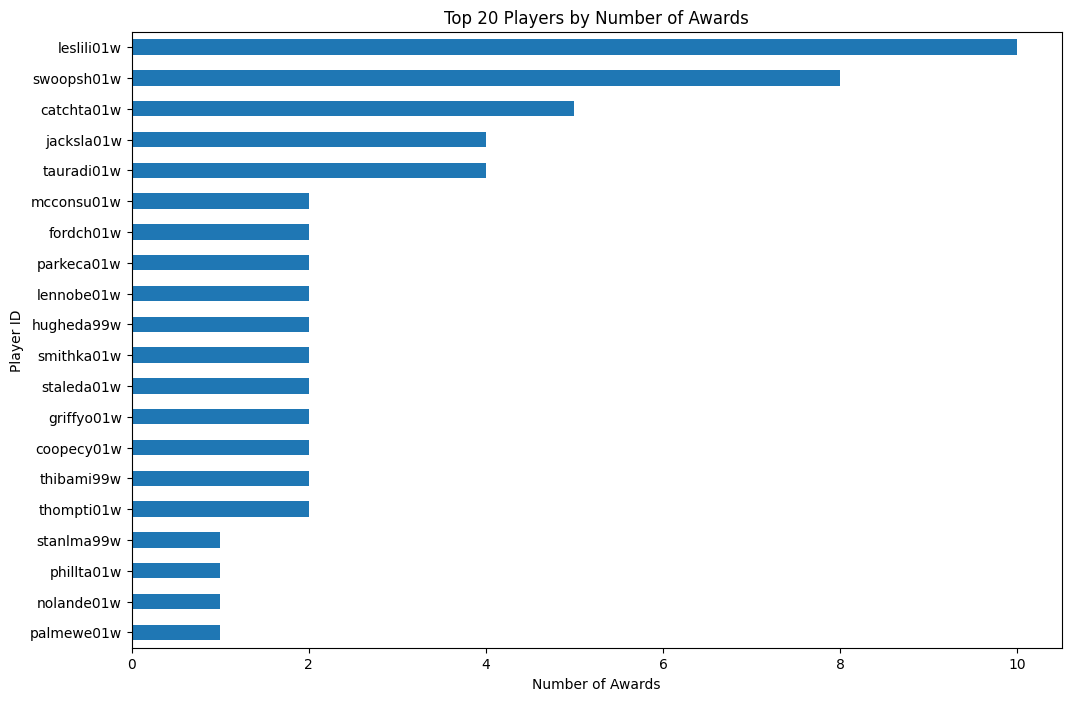

In [747]:
import matplotlib.pyplot as plt

# TOP 20 PLAYERS BY NUMBER OF AWARDS

# Group data by player and count the number of awards
award_counts = awards_players['award'].groupby(awards_players['playerID']).count()

# Sort the players by the number of awards received in descending order
award_counts = award_counts.sort_values(ascending=False)

# Create a horizontal bar chart
award_counts[:20].plot(kind='barh', figsize=(12, 8))  # Display the top 20 players
plt.title('Top 20 Players by Number of Awards')
plt.xlabel('Number of Awards')
plt.ylabel('Player ID')
plt.gca().invert_yaxis()  # Invert the y-axis for the highest award count at the top
plt.show()

- This next one displays the teams and the amount of times each one has made it to the playoffs. From the graph, it's possible to see that a good amount of teams consistently make it to the playoffs across seasons, namely LAS having done so in all seasons except for one. There are also however some teams that have never made it, and a few that made it just once.

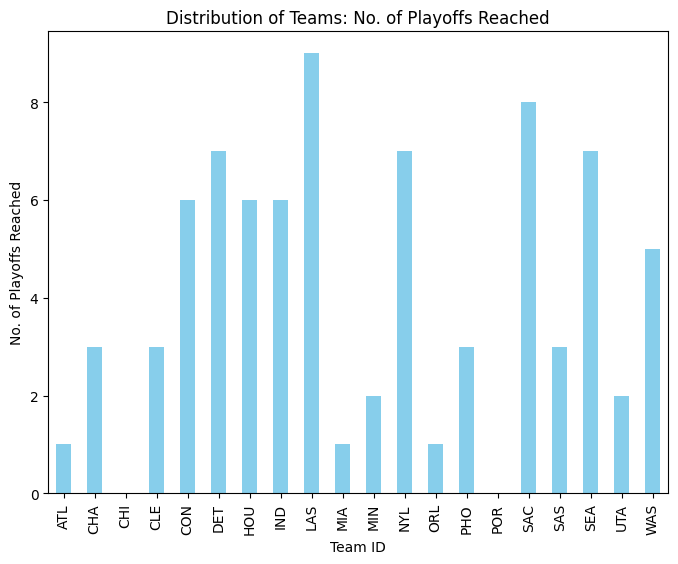

In [748]:
# Plotting teams and the amount of times they've made it to the playoffs
plt.figure(figsize=(8, 6))
teams.groupby(teams["tmID"]).sum()["playoff"].plot(kind='bar', color='skyblue')
plt.title('Distribution of Teams: No. of Playoffs Reached')
plt.xlabel('Team ID')
plt.ylabel('No. of Playoffs Reached')
plt.show()

- Next, let's explore the descriptive statistics of a team performance metrics, focusing on a few key metrics that are more likely to influence playoff qualification:
   - **Wins** (total, home, away, and within the conference)
   - **Losses** (total, home, away, and within the conference)
   - **Rank**
   - **Attendance**: This metric can reflect a team's popularity and/or fan engagement  
<br>  
  
- A summary of the results:
   - **Wins**: Teams that made it to the playoffs won, on average, around 20 games across the season, whereas teams that didn't make it only won around 12. Qualifying teams consistently won more games, whether home, away and within the conference than non-qualifying teams. As expected, teams have, on average, more Home Wins than Away Wins.
   - **Losses**: Playoff teams average around 13 losses per season, with non-playoff teams losing about 21 games.
   - **Rank**: Since playoff qualification is based on league rank, the playoff qualifying teams must be, and the metrics indeed show they are, ranked higher than non-qualifying ones. 
   - **Attendance**: The attendance for playoff teams is higher than that of non-playoff ones, around 14% percent higher more precisely.

In [749]:
# Selecting key performance metrics
key_metrics = ['won', 'homeW', 'awayW', 'confW', 'lost', 'homeL', 'awayL', 'confL', 'rank', 'attend']

# Grouping by 'playoff' and computing the mean for each metric
grouped_metrics = teams.groupby('playoff')[key_metrics].mean()

grouped_metrics

,won,homeW,awayW,confW,lost,homeL,awayL,confL,rank,attend
playoff,,,,,,,,,,
0,12.387097,7.903226,4.483871,7.677419,20.83871,8.709677,12.129032,13.483871,6.129032,131084.725806
1,19.975000,11.925000,8.050000,12.800000,13.42500,4.775000,8.650000,8.300000,2.500000,148773.537500


- To better visualize some of these metrics, these plots have been generated, comparing average wins and average losses between playoff and non-playoff teams.

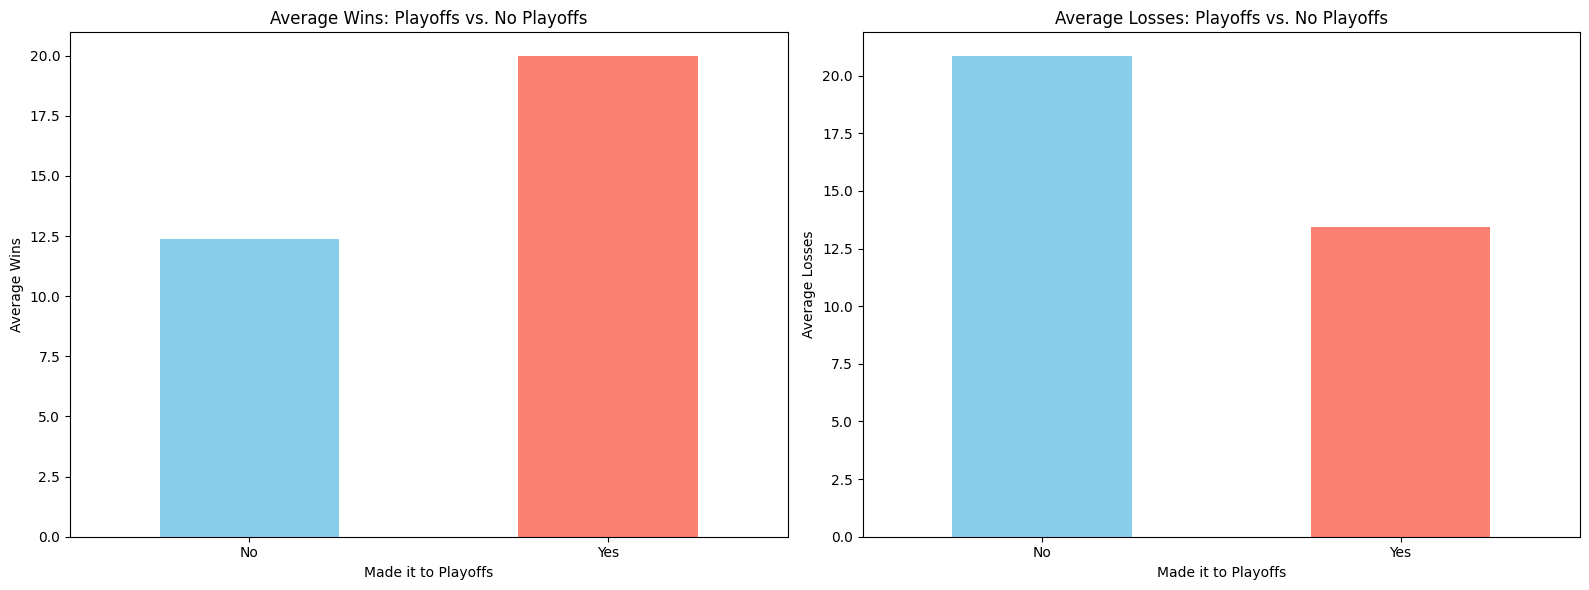

In [750]:
# Plotting average wins and losses for playoff vs. non-playoff teams
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Wins
grouped_metrics['won'].plot(kind='bar', ax=ax[0], color=['skyblue', 'salmon'])
ax[0].set_title('Average Wins: Playoffs vs. No Playoffs')
ax[0].set_xlabel('Made it to Playoffs')
ax[0].set_ylabel('Average Wins')
ax[0].set_xticklabels(['No', 'Yes'], rotation=0)

# Losses
grouped_metrics['lost'].plot(kind='bar', ax=ax[1], color=['skyblue', 'salmon'])
ax[1].set_title('Average Losses: Playoffs vs. No Playoffs')
ax[1].set_xlabel('Made it to Playoffs')
ax[1].set_ylabel('Average Losses')
ax[1].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.show()

- The following histogram shows us how many coaches achieved a specific number of victories with the teams they trained along the years in the WNBA. With this histogram, we can conclude that both victories and losses are fairly well distributed between coaches. There is a lot of coaches with around 16 losses and a considerable amount with around 18 wins and the rest are scattered between 0 and 30 wins and losses respectively. 

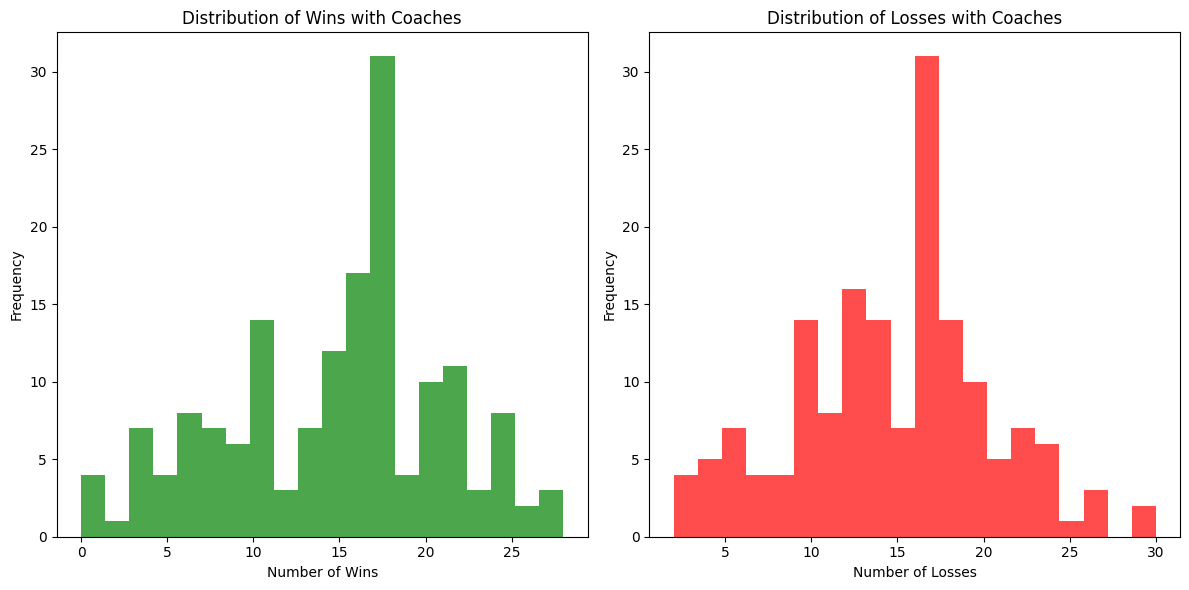

In [751]:
# COACHES HISTOGRAM

import seaborn as sns

# Select 'won' and 'lost' columns
won = coaches['won']
lost = coaches['lost']

# Create subplots to display histograms side by side
plt.figure(figsize=(12, 6))

# Create a histogram for the 'won' column
plt.subplot(1, 2, 1)
plt.hist(won, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Wins with Coaches')
plt.xlabel('Number of Wins')
plt.ylabel('Frequency')

# Create a histogram for the 'lost' column
plt.subplot(1, 2, 2)
plt.hist(lost, bins=20, color='red', alpha=0.7)
plt.title('Distribution of Losses with Coaches')
plt.xlabel('Number of Losses')
plt.ylabel('Frequency')

# Display the subplots
plt.tight_layout()
plt.show()

- According to the box plots below, the coaches are fairly spread between 0 and 25 in number of wins and between 0 and 30 in number of losses. However, 50% of the coaches have between 10 and 20 wins and, in terms of losses, 50% of the registered coaches have between 12 and 18 losses, approximately. This tells us that despite having some exceptionally good coaches and some exceptionally bad, the vast majority of them are failry well concentrated around the medium value of both wins and losses.

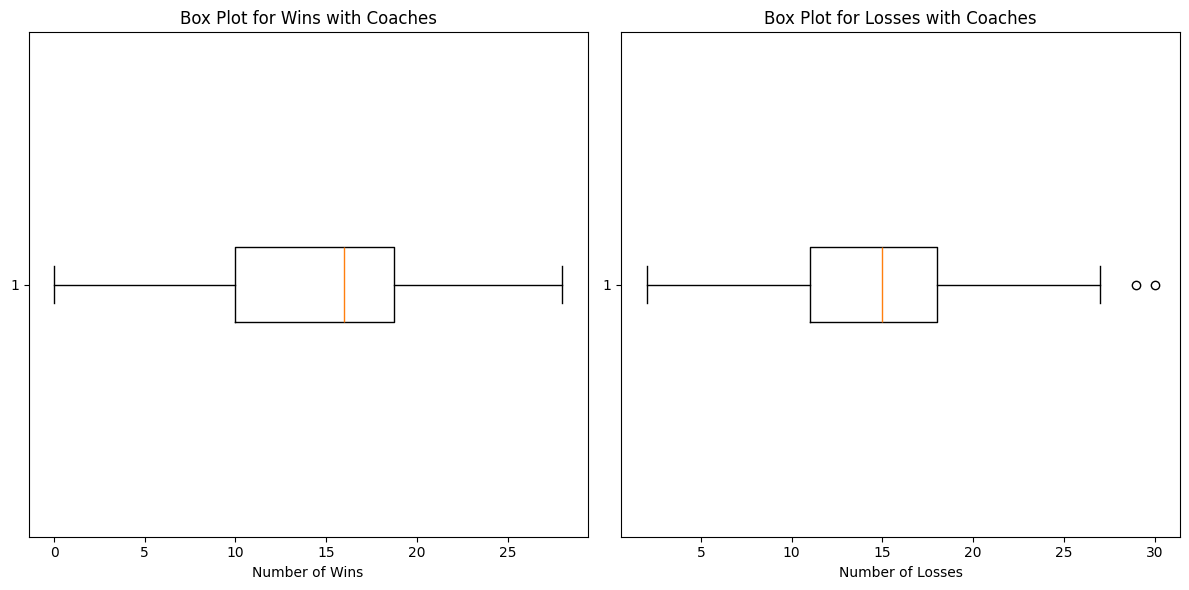

In [752]:
# COACHES WON-LOST BOX PLOT
# Create a box plot for 'won'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(won, vert=False)
plt.title('Box Plot for Wins with Coaches')
plt.xlabel('Number of Wins')

# Create a box plot for 'lost'
plt.subplot(1, 2, 2)
plt.boxplot(lost, vert=False)
plt.title('Box Plot for Losses with Coaches')
plt.xlabel('Number of Losses')

# Display the box plots
plt.tight_layout()
plt.show()

- The Correlation Matrix below helps us understand how the Coach statistics correlate with each other. The conclusions we got from this plot were that:
    - The year is weakly positive correlated to any of the other attributes of a Coach, meaning it influences wins, losses, playoff wins and playoff losses minimally but in a positive way
    - The number of wins has a weak negative influence on the number of losses but a strong positive influence in the number of wins and losses on the playoffs
    - The number of losses has a weak negative influence on the number of wins and a stronger but still weak negative influence in the number of wins and losses on the playoffs
    - The playoff wins have a strong positive correlation with pre-playoff wins and playoff losses
    - The playoff losses have a strong positive correlation with pre-playoff wins and playoff wins

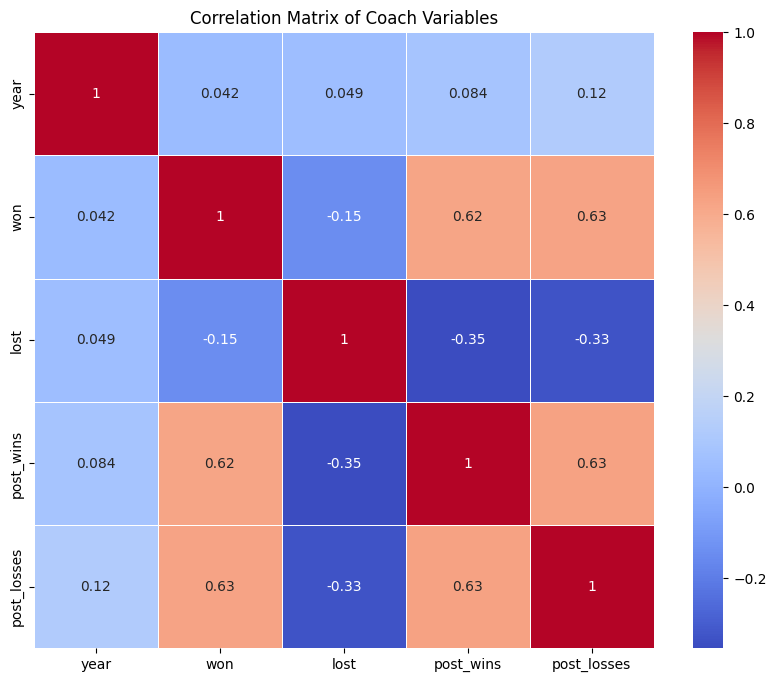

In [753]:
import seaborn as sns

# COACHES HEATMAP
# Select the columns for the correlation analysis
selected_columns = ['year', 'won', 'lost', 'post_wins', 'post_losses']

# Create a subset of the dataset with selected columns
coaches_subset = coaches[selected_columns]

# Calculate the correlation matrix
correlation_matrix = coaches_subset.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Coach Variables')
plt.show()

- With this plot, we can conclude that Guard is the most played position amongst the players and Center-Forward is the least played position in the WNBA. We can also visualize the distribution of players along other positions as well. It's worth noting that a player doesn't necessarily play always the same position.

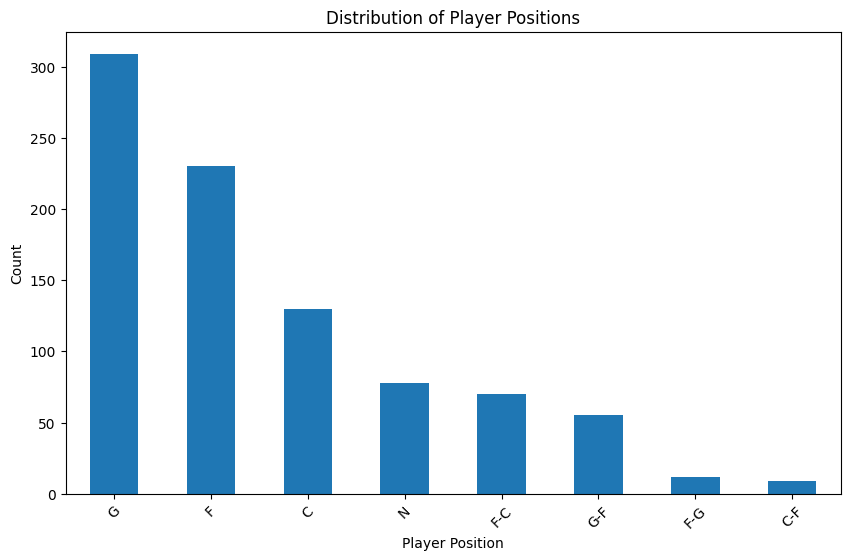

In [754]:
# Create a bar chart for the distribution of player positions
position_counts = players['pos'].value_counts()
position_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Player Positions')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- This plot allows us to conclude that 0.4% of the players in our dataset have already died and thus there are players that we have to consider in previous years (when they were alive and playing) but can't consider them now as part of any team.

C:\Users\filip\AppData\Local\Temp\ipykernel_21928\617199567.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  players['deathDate'] = pd.to_datetime(players['deathDate'], errors='coerce')


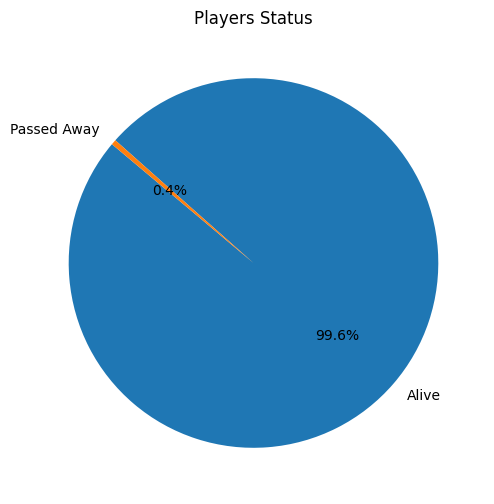

In [755]:
# Count of players still alive and those who have passed away
players['deathDate'] = pd.to_datetime(players['deathDate'], errors='coerce')
alive_players = players['deathDate'].isna().sum()
passed_away_players = players['deathDate'].notna().sum()

plt.figure(figsize=(6, 6))
plt.pie([alive_players, passed_away_players], labels=['Alive', 'Passed Away'], autopct='%1.1f%%', startangle=140)
plt.title('Players Status')
plt.show()

- To analyze the frequence of players with high performance statistics, we elaborated histograms comparing the amount of players with certain values of performance statistics. Here's what we concluded:
    - Players are fairly distributed when it comes to minutes played, obviously having more players leaning to having played less time
    - Some performance statistics are significantly lower in the majority of players (namely Free Throws and Three Point Goals) while others have a better distribution of players through high and low performance values (like Points Scored, Rebounds, Assists, Steals and Blocks)

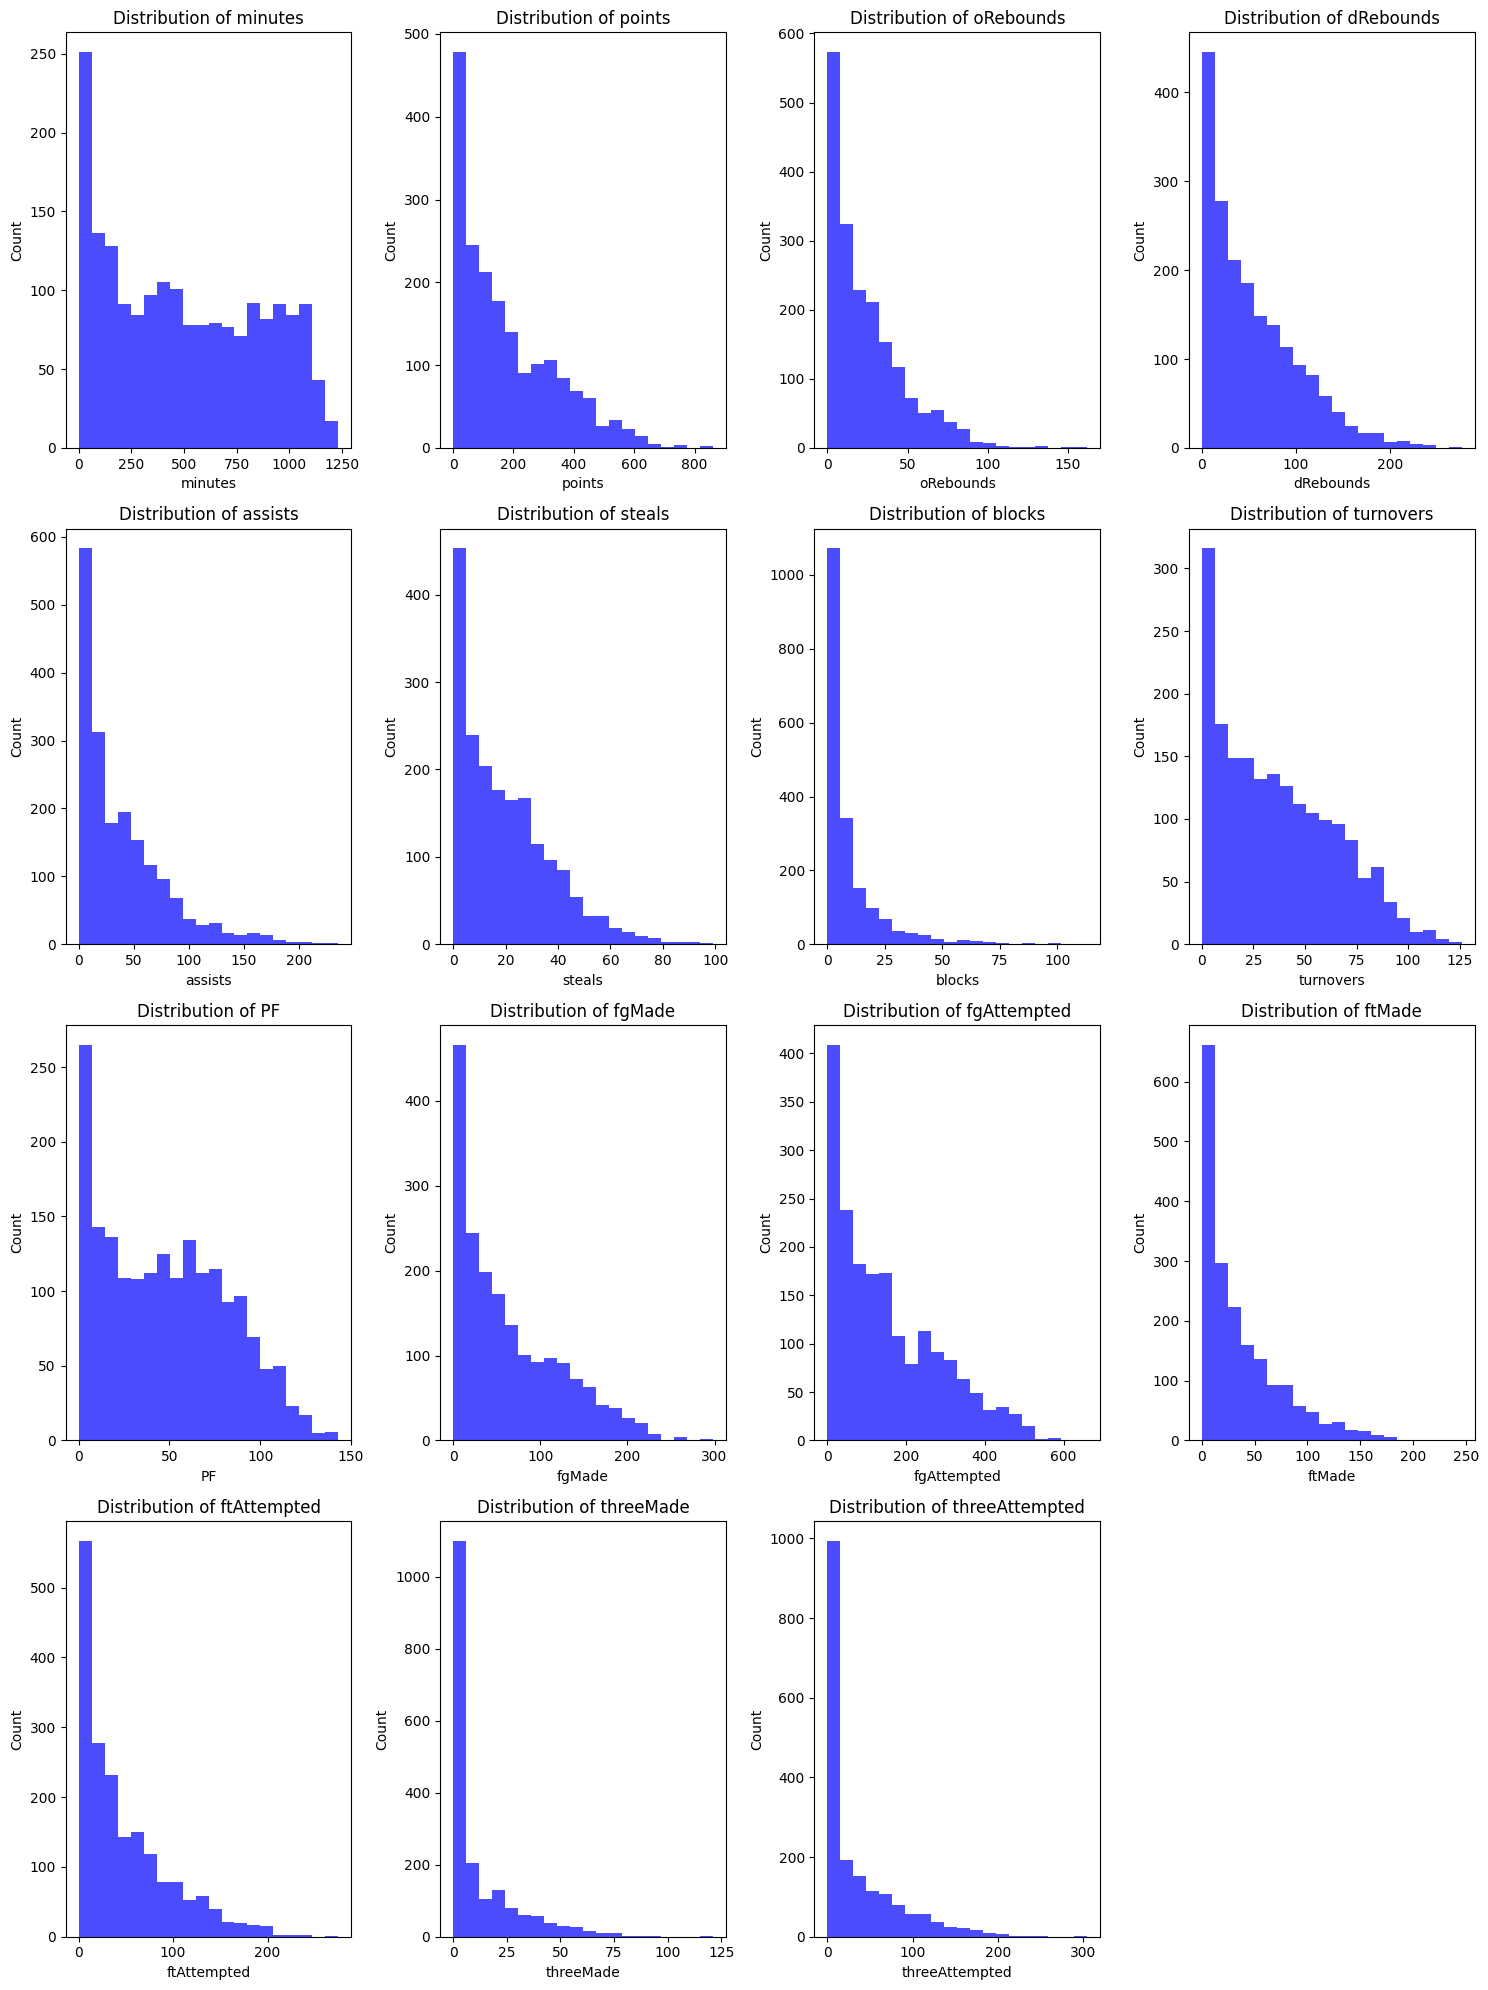

In [756]:
# Merge the 'Players' and 'Players-Teams' tables based on 'bioID'
merged_data = players_teams.merge(players[['bioID', 'birthDate']], left_on='playerID', right_on='bioID', how='inner')

# Select the performance statistics columns you want to create histograms for
performance_columns = ['minutes', 'points', 'oRebounds', 'dRebounds', 'assists', 'steals', 'blocks', 'turnovers', 'PF',
                      'fgMade', 'fgAttempted', 'ftMade', 'ftAttempted', 'threeMade', 'threeAttempted']

# Define the number of columns and rows for subplots
num_columns = 4
num_rows = (len(performance_columns) + num_columns - 1) // num_columns  # Calculate the number of rows

# Create histograms for each selected performance statistic
plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(performance_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    plt.hist(merged_data[column], bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

- The plots below allow us to visualize the best 20 players in each statistic side by side, to have an idea on the top values of the league.

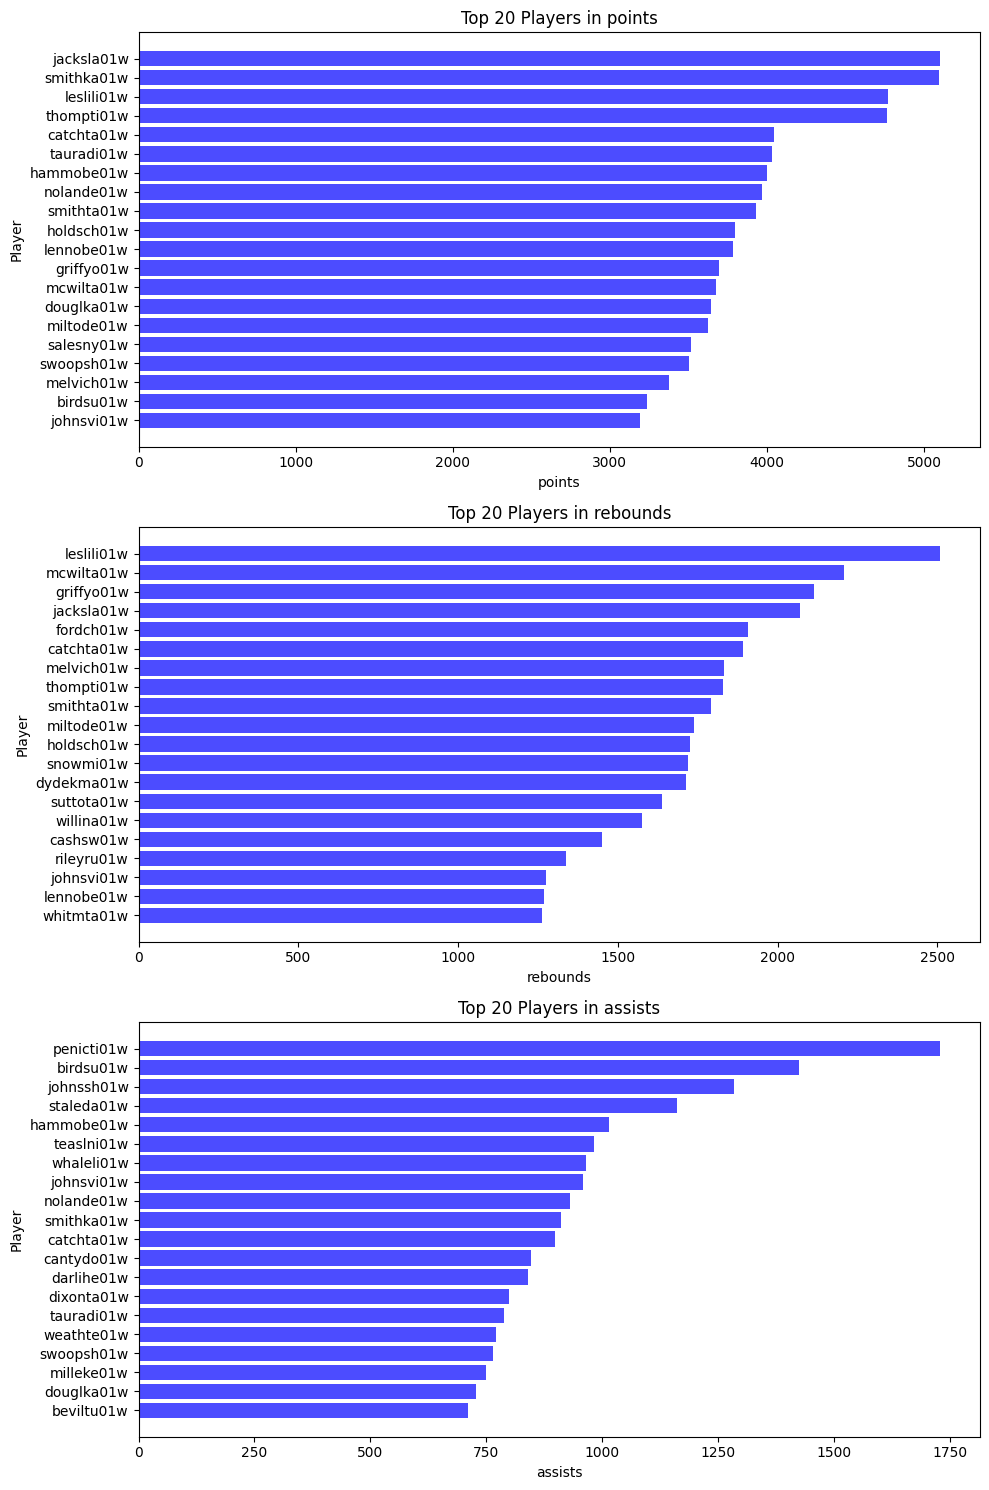

In [757]:
# Merge the 'Players' and 'Players-Teams' tables based on 'bioID'
merged_data = players_teams.merge(players[['bioID', 'birthDate', 'pos']], left_on='playerID', right_on='bioID', how='inner')

# List of performance statistics you want to consider
performance_statistics = ['points', 'rebounds', 'assists']

# Create subplots for each performance statistic
fig, axs = plt.subplots(len(performance_statistics), 1, figsize=(10, 15))

for i, stat in enumerate(performance_statistics):
    # Group data by player and calculate the total statistic for each player
    player_stats = merged_data.groupby('bioID')[stat].sum()

    # Sort players by the performance statistic in descending order and select the top 20
    top_players = player_stats.sort_values(ascending=False).head(20)

    # Create a bar chart for the top 20 players in the current statistic
    axs[i].barh(top_players.index, top_players.values, color='blue', alpha=0.7)
    axs[i].set_title(f'Top 20 Players in {stat}')
    axs[i].set_xlabel(stat)
    axs[i].set_ylabel('Player')
    axs[i].invert_yaxis()

plt.tight_layout()
plt.show()

- The plot below shows us how the points scored, assists and rebounds in matches distribute themselves between teams in the 10 seasons we have data on.

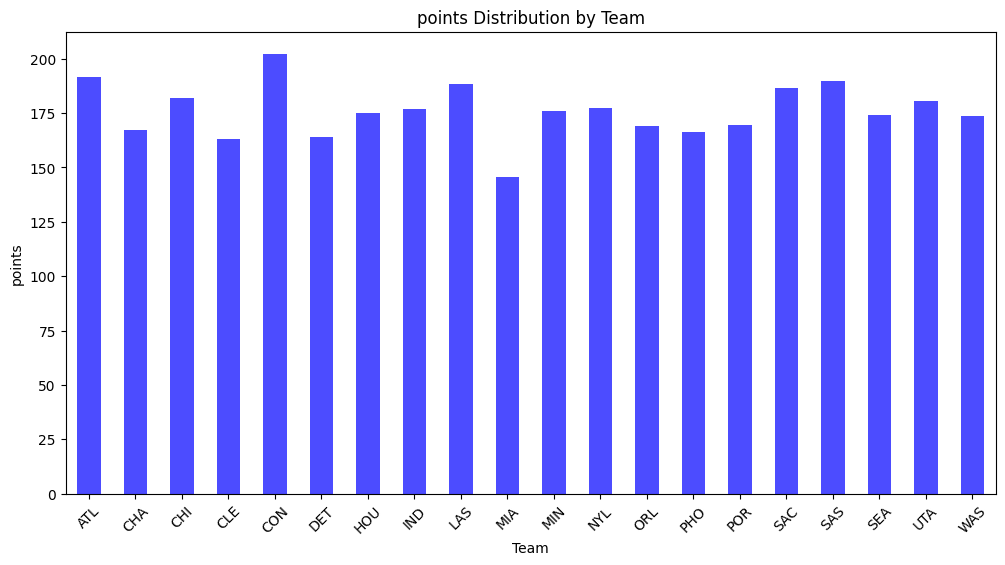

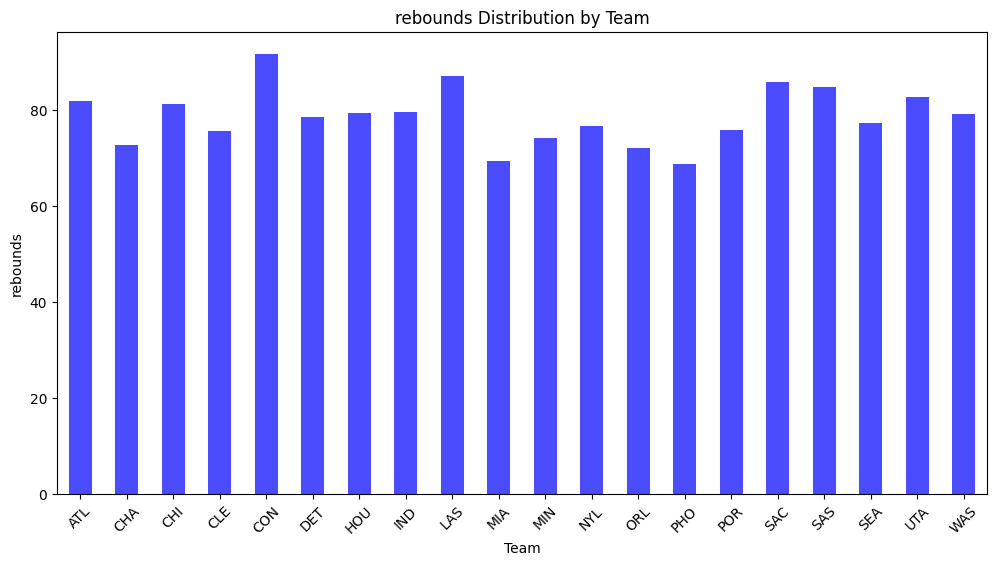

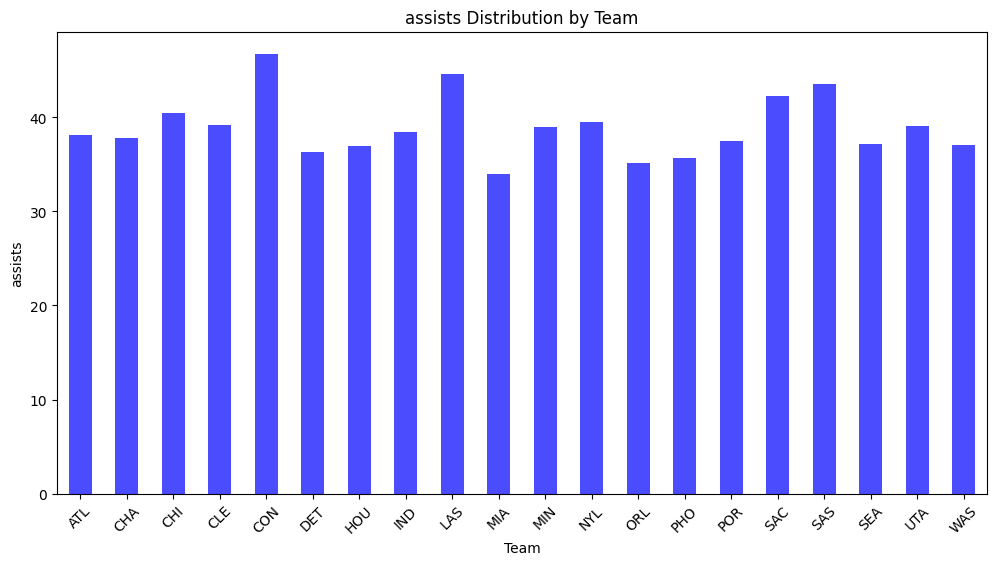

In [758]:
# Merge the 'Players' and 'Players-Teams' tables based on 'bioID'
merged_data = players_teams.merge(players[['bioID', 'birthDate']], left_on='playerID', right_on='bioID', how='inner')

# List of performance statistics you want to create histograms for
performance_statistics = ['points', 'rebounds', 'assists']

# Create histograms for each performance statistic separated by team
for stat in performance_statistics:
    # Group the data by team and calculate statistics for each team
    team_stats = merged_data.groupby('tmID')[stat].mean()

    # Create histograms for each team's performance
    plt.figure(figsize=(12, 6))
    team_stats.plot(kind='bar', color='blue', alpha=0.7)
    plt.title(f'{stat} Distribution by Team')
    plt.xlabel('Team')
    plt.ylabel(stat)
    plt.xticks(rotation=45)
    plt.show()

- According to this correlation matrix between players performance statistic and wins and losses of their teams, we can take many conclusions:
    - Minutes Played has (as expected) a strong positive impact in all other player performances, despite having a weak megative impact on number of wins and losses
    - Assists and Offensive Rebounds do not strongly correlate to each other, having only a weak positive impact over the other. The same happens between Assists and Blocks.
    - The rest of the player performance statistics strongly correlate positively to each  other, with an highlight for Points Scored, that is strongly positively impacted by all of them except Blocks.
    - The number of wins and losses of a team is not strongly impacted by any of the statistics individually, meaning that one of them alone wouldn't be enough to define a win or a loss in a game.

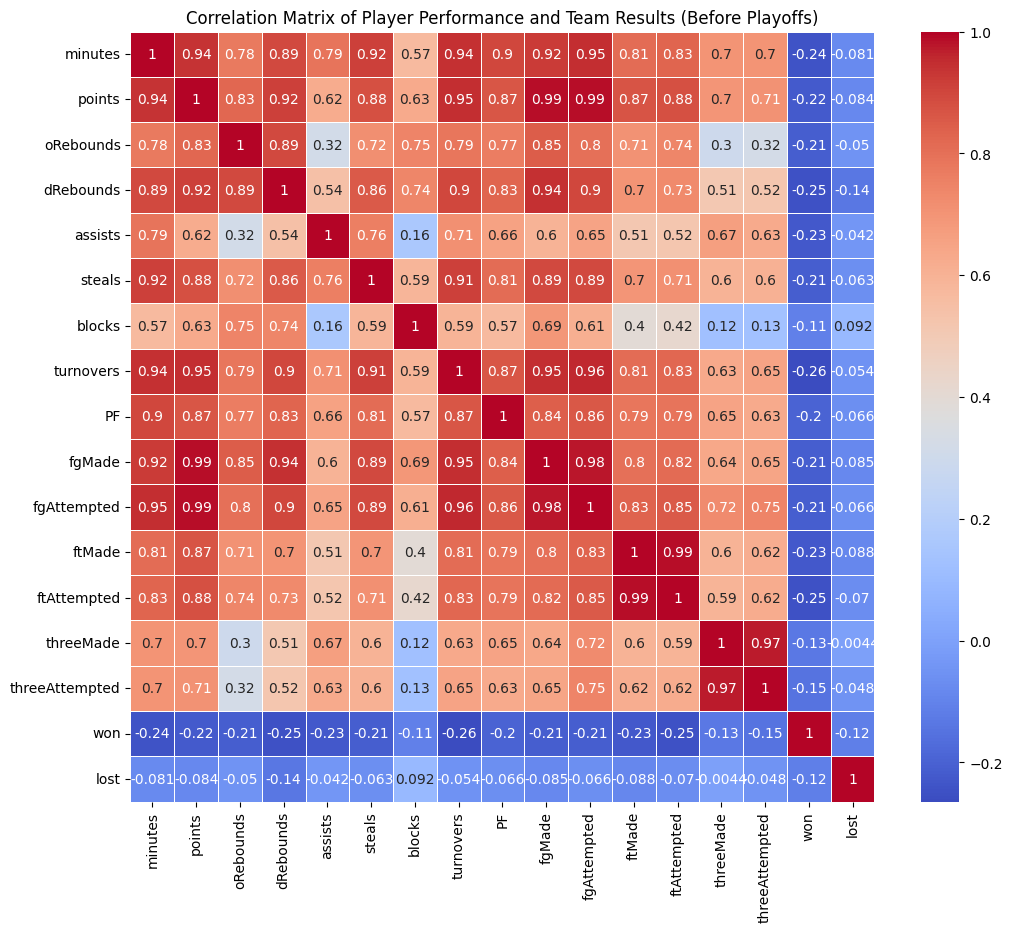

In [759]:

# Merge the 'Players' and 'Players-Teams' tables based on 'bioID'
merged_data = players_teams.merge(players[['bioID', 'birthDate', 'pos']], left_on='playerID', right_on='bioID', how='inner')

# Filter data for matches before the playoffs
before_playoffs_data = merged_data[merged_data['stint'] == 1]

# Merge 'Coaches' data to associate players with team results before playoffs
combined_data = before_playoffs_data.merge(coaches[['year', 'tmID', 'won', 'lost']], on=['year', 'tmID'], how='inner')

# Select relevant player performance statistics and team results columns
performance_statistics = ['minutes','points', 'oRebounds', 'dRebounds', 'assists', 'steals', 'blocks', 'turnovers', 'PF',
                         'fgMade', 'fgAttempted', 'ftMade', 'ftAttempted', 'threeMade', 'threeAttempted']
team_results = ['won', 'lost']

# Calculate the correlation matrix
correlation_matrix = combined_data[performance_statistics + team_results].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Player Performance and Team Results (Before Playoffs)')
plt.show()

- This plot allows us to see each team amount of wins along the seasons and compare them with each other. Analysing it, we can conclude that there were teams that were on top some seasons ago and are now decaying in terms of wins while some teams that were lower positioned before are now doing better. This allows us to understand that despite a team having won a lot of matches last year, as players and coaches switch and their performance varies, it is possible for a team to have a completely different performance next season.

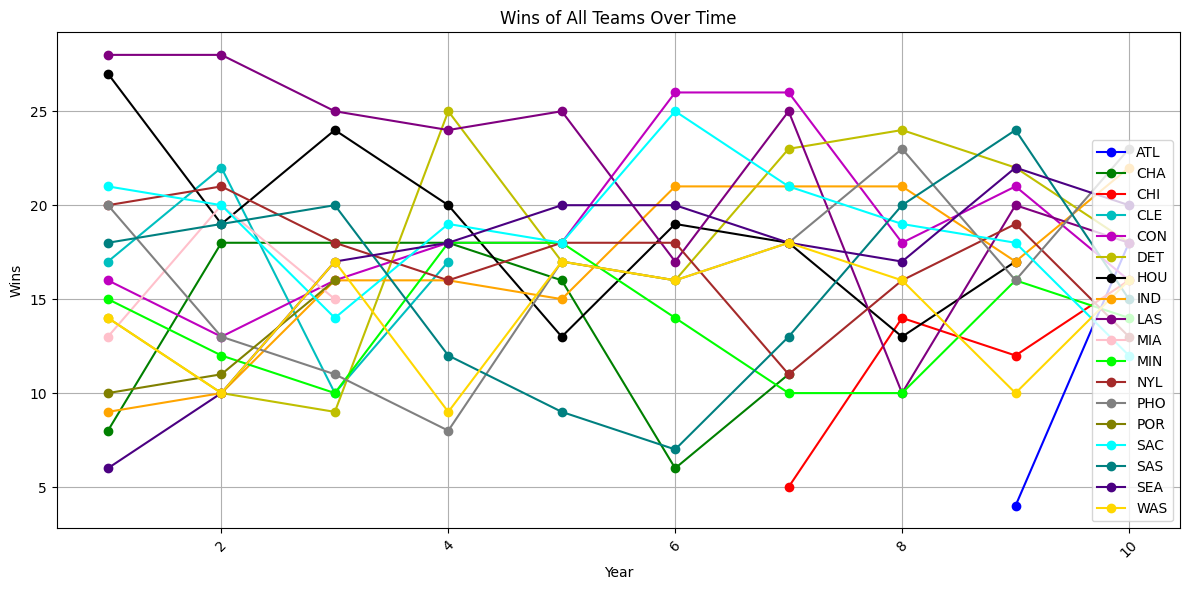

In [760]:

# Sort the data by the year (or relevant time variable).
teams_sorted = teams.sort_values(by='year')

# Create a line chart to visualize the wins of all teams over time.
plt.figure(figsize=(12, 6))

# Define a list of distinct line colors for the teams.
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink',
          'lime', 'brown', 'gray', 'olive', 'cyan', 'teal', 'indigo', 'gold', 'darkred']

# Iterate over each team and set the line color from the 'colors' list.
for i, (team, data) in enumerate(teams_sorted.groupby('franchID')):
    color = colors[i % len(colors)]
    plt.plot(data['year'], data['won'], label=team, marker='o', color=color)

# Customize the chart labels and title.
plt.xlabel('Year')
plt.ylabel('Wins')
plt.title('Wins of All Teams Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Add a legend to distinguish teams and place it in the upper left corner.
plt.legend(loc='lower right')

# Show the line chart.
plt.grid(True)
plt.tight_layout()
plt.show()

- This plot shows us the percentage of seasons where each team qualified for the playoffs. Judging by this plot and assuming there weren't a lot of changes to the teams, there are some teams that are more probably going to qualify in the next season.

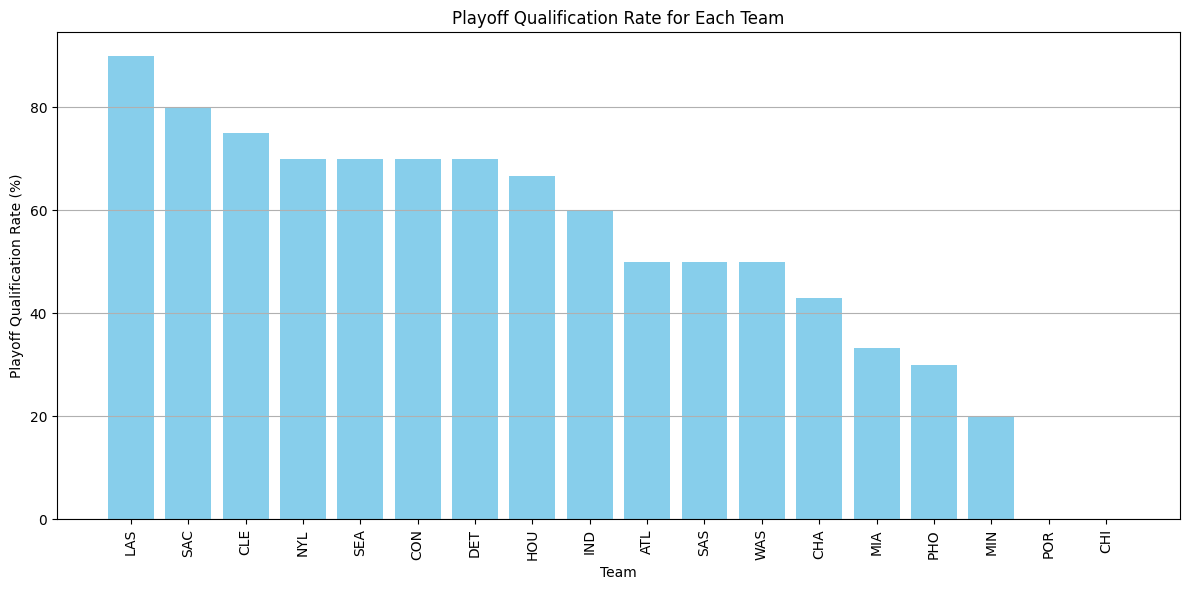

In [761]:

# Group the data by team and calculate the playoff qualification rate.
team_playoff_stats = teams.groupby('franchID').agg({'playoff': 'sum', 'year': 'count'})

# Calculate the playoff qualification rate as the number of playoff appearances divided by the total seasons.
team_playoff_stats['qualification_rate'] = (team_playoff_stats['playoff'] / team_playoff_stats['year']) * 100

# Sort the data by qualification rate in descending order.
team_playoff_stats = team_playoff_stats.sort_values(by='qualification_rate', ascending=False)

# Create a bar chart to display the playoff qualification rate for each team.
plt.figure(figsize=(12, 6))
plt.bar(team_playoff_stats.index, team_playoff_stats['qualification_rate'], color='skyblue')
plt.xlabel('Team')
plt.ylabel('Playoff Qualification Rate (%)')
plt.title('Playoff Qualification Rate for Each Team')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the bar chart.
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- Observing this bar chart, we can conclude that West Conference teams have slightly won more matches than East Conference teams but both seem fairly balanced. 

<Figure size 1000x600 with 0 Axes>

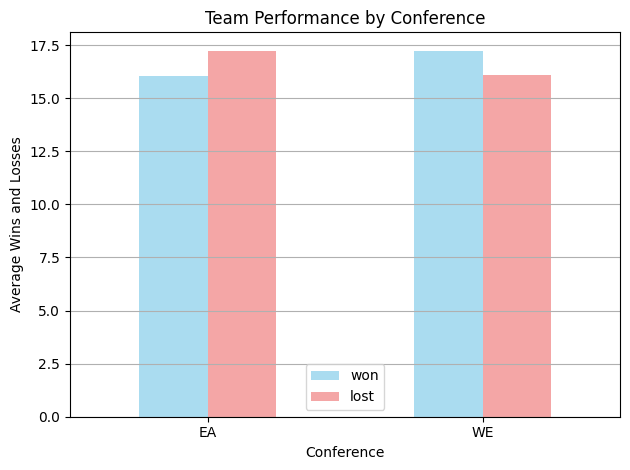

In [762]:
# Group the data by conference and calculate the average number of wins and losses.
conference_stats = teams.groupby('confID').agg({'won': 'mean', 'lost': 'mean'})

# Create a bar chart to compare team performances by conference.
plt.figure(figsize=(10, 6))
conference_stats.plot(kind='bar', color=['skyblue', 'lightcoral'], alpha=0.7, stacked=False)
plt.xlabel('Conference')
plt.ylabel('Average Wins and Losses')
plt.title('Team Performance by Conference')
plt.xticks(rotation=0)  # Remove rotation for horizontal labels

# Show the bar chart.
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- This plot allows us to see how team performance varies each year with different team attendance values. From here we can conclude:
    - Teams that had the bigger attendance values are also the ones with better performances but its also in that zone of the statistics that we find the teams with worse performances
    - Teams that have a really low attendance or a really high attendance have a performance closer to average

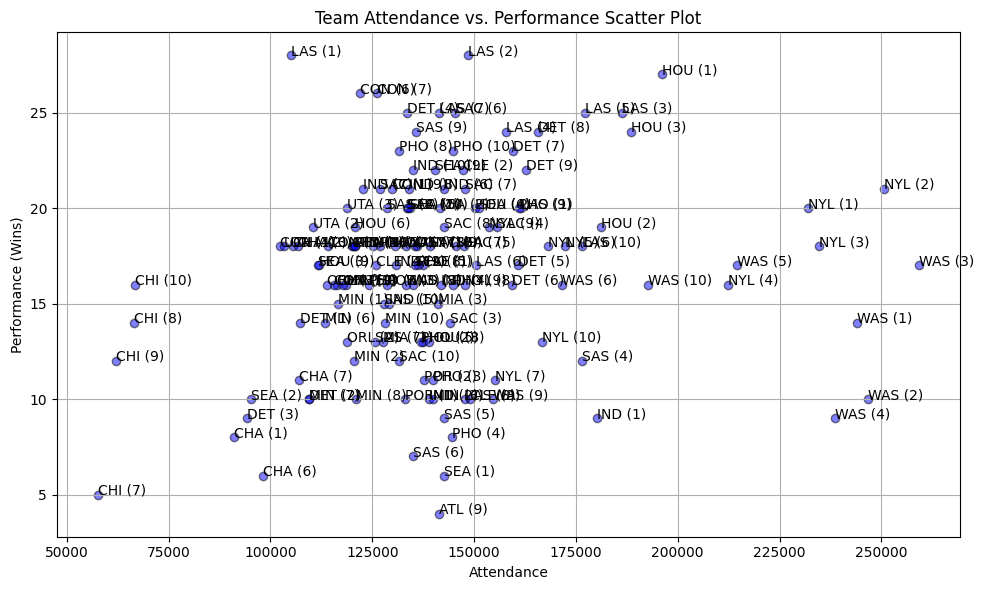

In [763]:

# Select the columns for attendance and performance
attendance_column = 'attend'
performance_column = 'won'  # You can choose 'won', 'lost', or other performance metric

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(teams[attendance_column], teams[performance_column], c='b', alpha=0.5, edgecolors='k')

# Add labels for individual data points (teams) with their respective years
for i, team in enumerate(teams['tmID']):
    plt.annotate(f'{team} ({teams["year"].iloc[i]})', (teams[attendance_column][i], teams[performance_column][i]))

plt.xlabel('Attendance')
plt.ylabel('Performance (Wins)')
plt.title('Team Attendance vs. Performance Scatter Plot')

# Show the scatter plot
plt.grid(True)
plt.tight_layout()
plt.show()

- This Correlation Matrix compare Team Performance Statistics and their Attendance values. From this plot we can conclude that:
    - Games Played and Attendance are obviously strongly positively correlated and so are the total wins with each type of win counts (same for losses)
    - Attendance is not positiviely correlated to any of the team performance statistics individually, meaning that just the attendance isn't enough to determine a team's performance during a season

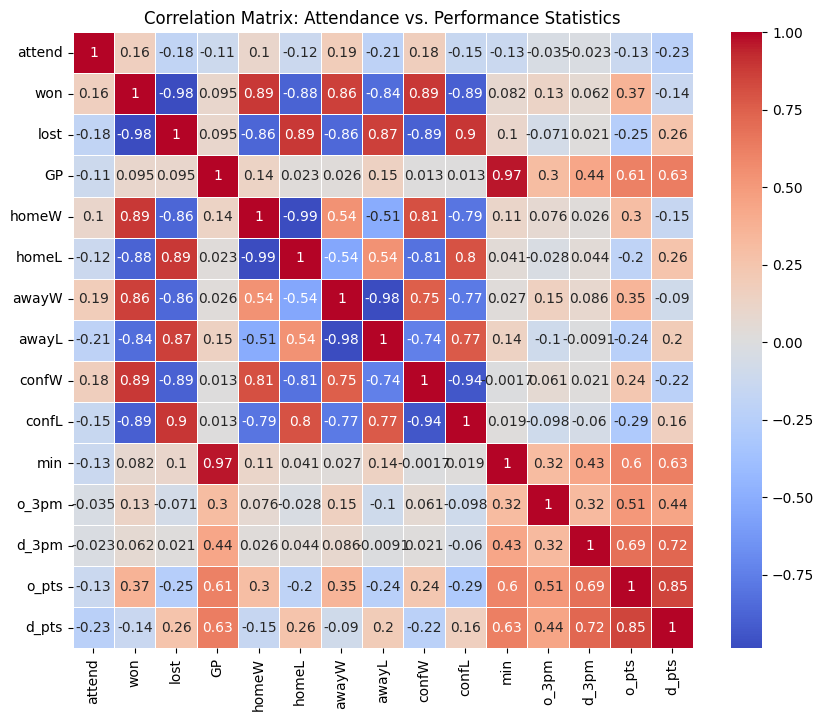

In [764]:
# Select columns for attendance and performance statistics (excluding opponent statistics)
selected_columns = ['attend', 'won', 'lost', 'GP', 'homeW', 'homeL', 'awayW', 'awayL',
                    'confW', 'confL', 'min', 'o_3pm', 'd_3pm', 'o_pts', 'd_pts']

# Create a new DataFrame with only the selected columns
team_performance = teams[selected_columns]

# Calculate the correlation matrix
correlation_matrix = team_performance.corr()

# Create a heatmap of the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix: Attendance vs. Performance Statistics')
plt.show()

- Based on the box plot below we can conclude that:
    - Home Wins are more frequent than Away Wins
    - Home Win amount is more spread than Away Win amount, even in terms of the 50% of the data more close to average 

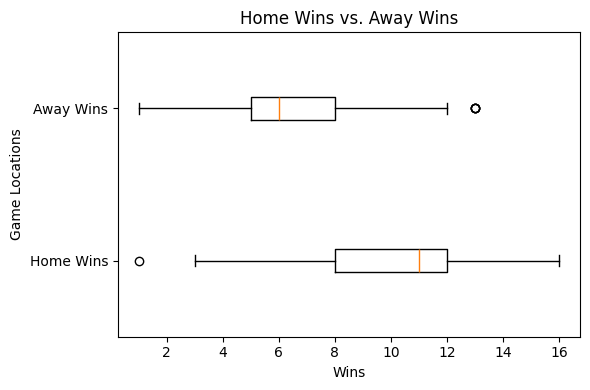

In [765]:

# Select columns for home wins and away wins
home_wins = teams['homeW']
away_wins = teams['awayW']

# Create a new DataFrame with selected columns
wins_data = pd.DataFrame({'Home Wins': home_wins, 'Away Wins': away_wins})

# Create a box plot to compare home wins and away wins
plt.figure(figsize=(6, 4))

plt.boxplot(wins_data.values, labels=wins_data.columns, vert=False)
plt.title('Home Wins vs. Away Wins')
plt.xlabel('Wins')
plt.ylabel('Game Locations')

plt.tight_layout()
plt.show()

## Step 4: Feature Engineering

In this step, we will decide what features to use in the model and how put them together.


- The player awards intend to demonstrate the value that player/coach has, its remarkable capabilities that stand out from the rest, and the potential it can bring to their team's success. 

  Therefore, it would make sense to assume that a team whose members have attained more awards, likely has a higher chance to succeed and make the playoffs. There are also several kind of awards, some more important than others - especially in the sense of influencing a team's overall success (eg: sportmanship awards) - that hold more meaning and represent higher accolades.  
  
  In this vein, each award will be associated with an arbitrary numerical value, the higher this value being, the more valuable the award is.

In [766]:
# Show all the different awards present in the *awards_players* table
awards_players['award'].unique()

array(['All-Star Game Most Valuable Player', 'Coach of the Year',
       'Defensive Player of the Year', 'Kim Perrot Sportsmanship',
       'Kim Perrot Sportsmanship Award', 'Most Improved Player',
       'Most Valuable Player', 'Rookie of the Year',
       'Sixth Woman of the Year', 'WNBA Finals Most Valuable Player',
       'WNBA All-Decade Team', 'WNBA All Decade Team Honorable Mention'],
      dtype=object)

In [767]:
# Assign numerical values to each award
award_values = {
    'All-Star Game Most Valuable Player': 3.5,
    'Coach of the Year': 3,
    'Defensive Player of the Year': 2,
    'Kim Perrot Sportsmanship': 1,
    'Kim Perrot Sportsmanship Award': 1,
    'Most Improved Player': 2,
    'Most Valuable Player': 4,
    'Rookie of the Year': 2.5,
    'Sixth Woman of the Year': 1.5,
    'WNBA Finals Most Valuable Player': 3,
    'WNBA All-Decade Team': 5,
    'WNBA All Decade Team Honorable Mention': 4.5
}

# Create new column with the numerical value for each award
awards_players['award_value'] = [award_values[award] for award in awards_players['award']]

awards_players

,playerID,award,year,lgID,award_value
0,thompti01w,All-Star Game Most Valuable Player,1,WNBA,3.5
1,leslili01w,All-Star Game Most Valuable Player,2,WNBA,3.5
2,leslili01w,All-Star Game Most Valuable Player,3,WNBA,3.5
3,teaslni01w,All-Star Game Most Valuable Player,4,WNBA,3.5
4,swoopsh01w,All-Star Game Most Valuable Player,6,WNBA,3.5
...,...,...,...,...,...
90,boltoru01w,WNBA All Decade Team Honorable Mention,7,WNBA,4.5
91,holdsch01w,WNBA All Decade Team Honorable Mention,7,WNBA,4.5
92,penicti01w,WNBA All Decade Team Honorable Mention,7,WNBA,4.5
93,tauradi01w,WNBA All Decade Team Honorable Mention,7,WNBA,4.5


- Many attributes across the tables are redundant, for example, the stats displayed in the team's *teams* table is just an aggregation and sum of the individual player's stats of that team in that year in the respective *players_teams* table. Since the data is already mostly summarized in the *teams* table, that will be the main table to look at as the features to be used in the models are selected.  

  Some tables also contain data pertaining to the post season, which is outside the scope of determining whether a team makes it in the post season in the first place. Including this kind of information in our models would lead to data leakage, thus they'll be left out.  
  
- Looking into the *teams* table, and the heatmap showcasing the correlation between its features and the target, these are the features selected to train the models:

|       Name        | Feature  |
| ----------------- | :------: |
| Year              | `year`   |
| Team              | `tmID`   |
| Wins              | `won`    |
| Home wins         | `homeW`  |
| Away wins         | `awayW`  |
| Conf wins         | `confW`  |
| Attendance        | `attend` |
| Team's points     | `d_pts`  |
| Opponent's points | `o_pts`  |
   
<br>

- To cut down on the number of features selected, some of them are fused into new features, for example:
   - Wins are turned into a ratio by diving with the total amount of games played by the team in that year
   - Point scored against are deducted from the points score, becoming a point difference

In [768]:
# Filter the *teams* table by the selected features
teams_selected_features = ['year', 'tmID', 'playoff', 'won', 'homeW', 'awayW', 'confW', 'rank', 'attend', 'd_pts', 'o_pts']
train_df = teams[teams_selected_features]

# Create the new features, combining exisiting ones
train_df['win_ratio'] = train_df['won'] / teams['GP']
train_df['home_win_ratio'] = train_df['homeW'] / (teams['homeW'] + teams['homeL'])
train_df['away_win_ratio'] = train_df['awayW'] / (teams['awayW'] + teams['awayL'])
train_df['conf_win_ratio'] = train_df['confW'] / (teams['confW'] + teams['confL'])
train_df['point_dif'] = train_df['d_pts'] - train_df['o_pts']

# Drop the now redundant features
train_df.drop(columns=['won', 'homeW', 'awayW', 'confW', 'd_pts', 'o_pts', 'rank'], inplace=True)

train_df


,year,tmID,playoff,attend,win_ratio,home_win_ratio,away_win_ratio,conf_win_ratio,point_dif
0,9,ATL,0,141379,0.117647,0.058824,0.176471,0.100000,345
1,10,ATL,1,120737,0.529412,0.705882,0.352941,0.454545,-64
2,1,CHA,0,90963,0.250000,0.312500,0.187500,0.238095,243
3,2,CHA,1,105525,0.562500,0.687500,0.437500,0.714286,-46
4,3,CHA,1,106670,0.562500,0.687500,0.437500,0.571429,-108
...,...,...,...,...,...,...,...,...,...
137,6,WAS,0,171501,0.470588,0.588235,0.352941,0.450000,42
138,7,WAS,1,133255,0.529412,0.764706,0.294118,0.600000,-90
139,8,WAS,0,133255,0.470588,0.470588,0.470588,0.400000,54
140,9,WAS,0,154637,0.294118,0.352941,0.235294,0.300000,233


- To these, the average player's height and weight of each team in every year is added.

In [769]:
# Merge player data with their respective team and year in *players_team* table
player_data_team_merged_df = pd.merge(players, players_teams, left_on='bioID', right_on='playerID')
player_data_team_merged_df = player_data_team_merged_df[['bioID', 'tmID', 'year', 'height', 'weight']]

# Calculate the average height and weight of players of every team for every year
avg_stats = round(player_data_team_merged_df.groupby(['tmID', 'year'])[['height', 'weight']].mean(), 2)
avg_stats.rename(columns={"height": "avg_player_height", "weight": "avg_player_weight"}, inplace=True)

# Combine the average player stats with the training data by team and year
train_df = pd.merge(train_df, avg_stats, on=["tmID", "year"])

- Finally, merge with the player and coaches awards' values, also by team and per year.

In [770]:
# Merge player award data with their respective team and year in *players_team* table
player_award_team_merged_df = pd.merge(awards_players, players_teams, on=['playerID', 'year', 'lgID'])
player_award_team_merged_df = player_award_team_merged_df[['playerID', 'tmID', 'year', 'award', 'award_value']]

# Calculate the sum of players awards' values of every team for every year
player_award_values_sum = player_award_team_merged_df.groupby(['tmID', 'year'])['award_value'].sum()
player_award_values_sum.name = 'sum_award_values'

# Combine the sum player award values with the training data by team and year
train_df = pd.merge(train_df, player_award_values_sum, how="left", on=["tmID", "year"])

# Merge coach award data with their respective team and year in *coaches* table
coach_award_team_merged_df = pd.merge(awards_players, coaches, left_on=['playerID', 'year', 'lgID'], right_on=['coachID', 'year', 'lgID'])
coach_award_team_merged_df.rename(columns={'award_value': 'coach_award_value'}, inplace=True)
coach_award_team_merged_df = coach_award_team_merged_df[['tmID', 'year', 'coach_award_value']]

# Combine the coach award values with the training data by team and year
train_df = pd.merge(train_df, coach_award_team_merged_df, how="left", on=["tmID", "year"])

# Replace NaN values from the resulting merges with 0
train_df.fillna(0, inplace=True)

# Sum the players awards' value with the coach's
train_df['sum_award_values'] = train_df['sum_award_values'] + train_df['coach_award_value']
train_df.drop(columns=['coach_award_value'], inplace=True)

The final training dataset looks as shown below:

In [771]:
# Display the train dataset
train_df
train_df.drop(columns=['tmID'], inplace=True)

## Step 5: Model Evaluation

In this step, the data is split into training and testing sets, and then a series of models are trained and evaluated.

I will now start by a dataframe that will record all results to be compared later on.



In [772]:

results_list = []

# Assume model_names is a list of your model names, e.g., ['Model 1', 'Model 2', ..., 'Model 7']
model_names = ['Random Forest', 'Decision Tree', 'SVM', 'KNN', 'Logistic Regression', 'Naive Bayes', 'Neural Networks']

### Random Forest

In [773]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

# Assuming train_df is your original DataFrame and teams['playoff'] is your target variable
for current_year in range(2, 11):  # Loop from year 2 to year 10
    # Gather all data from previous years for training
    train_rf_df = train_df[train_df['year'] < current_year]
    
    # Gather data from the current year for testing
    test_df = train_df[train_df['year'] == current_year]
    
    # Prepare training and testing data
    X_train = train_rf_df.drop(['playoff', 'year'], axis=1)  # Assuming 'year' is not a feature you want to include
    y_train = train_rf_df['playoff']
    
    X_test = test_df.drop(['playoff', 'year'], axis=1)
    y_test = test_df['playoff']
    
    # Train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate the model
    error = mean_absolute_error(y_test, predictions)
    print(f'Year: {current_year}, Mean Absolute Error: {error}')
    results_list.append({'Year': current_year, 'Model': 'Random Forest', 'Mean Absolute Error': error})


Year: 2, Mean Absolute Error: 0.0625
Year: 3, Mean Absolute Error: 0.0625
Year: 4, Mean Absolute Error: 0.14285714285714285


Year: 5, Mean Absolute Error: 0.15384615384615385
Year: 6, Mean Absolute Error: 0.07692307692307693
Year: 7, Mean Absolute Error: 0.07142857142857142
Year: 8, Mean Absolute Error: 0.07692307692307693
Year: 9, Mean Absolute Error: 0.07142857142857142
Year: 10, Mean Absolute Error: 0.15384615384615385


### Decision Tree

In [774]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

for current_year in range(2, 11):  

    train_dt_df = train_df[train_df['year'] < current_year]
    
    test_df = train_df[train_df['year'] == current_year]
    
    X_train = train_dt_df.drop(['playoff', 'year'], axis=1)  
    y_train = train_dt_df['playoff']
    
    X_test = test_df.drop(['playoff', 'year'], axis=1)
    y_test = test_df['playoff']
    
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    error = mean_absolute_error(y_test, predictions)
    print(f'Year: {current_year}, Mean Absolute Error: {error}')
    results_list.append({'Year': current_year, 'Model': 'Decision Tree', 'Mean Absolute Error': error})


Year: 2, Mean Absolute Error: 0.0
Year: 3, Mean Absolute Error: 0.1875
Year: 4, Mean Absolute Error: 0.21428571428571427
Year: 5, Mean Absolute Error: 0.23076923076923078
Year: 6, Mean Absolute Error: 0.15384615384615385
Year: 7, Mean Absolute Error: 0.0
Year: 8, Mean Absolute Error: 0.07692307692307693
Year: 9, Mean Absolute Error: 0.07142857142857142
Year: 10, Mean Absolute Error: 0.23076923076923078


### SVM

In [775]:
import pandas as pd
from sklearn.svm import SVC  
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt  

for current_year in range(2, 11):  

    train_svm_df = train_df[train_df['year'] < current_year]
    
    test_df = train_df[train_df['year'] == current_year]
    
    X_train = train_svm_df.drop(['playoff', 'year'], axis=1)  
    y_train = train_svm_df['playoff']
    
    X_test = test_df.drop(['playoff', 'year'], axis=1)
    y_test = test_df['playoff']
    
    model = SVC(random_state=42)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    error = mean_absolute_error(y_test, predictions)
    print(f'Year: {current_year}, Mean Absolute Error: {error}')
    results_list.append({'Year': current_year, 'Model': 'SVM', 'Mean Absolute Error': error})


Year: 2, Mean Absolute Error: 0.4375
Year: 3, Mean Absolute Error: 0.25
Year: 4, Mean Absolute Error: 0.7857142857142857
Year: 5, Mean Absolute Error: 0.3076923076923077
Year: 6, Mean Absolute Error: 0.38461538461538464
Year: 7, Mean Absolute Error: 0.35714285714285715
Year: 8, Mean Absolute Error: 0.3076923076923077
Year: 9, Mean Absolute Error: 0.35714285714285715
Year: 10, Mean Absolute Error: 0.3076923076923077


### KNN

In [776]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt  
import seaborn as sns  

for current_year in range(2, 11): 

    train_knn_df = train_df[train_df['year'] < current_year]
    
    test_df = train_df[train_df['year'] == current_year]
    
    X_train = train_knn_df.drop(['playoff', 'year'], axis=1) 
    y_train = train_knn_df['playoff']
    
    X_test = test_df.drop(['playoff', 'year'], axis=1)
    y_test = test_df['playoff']
    
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    error = mean_absolute_error(y_test, predictions)
    print(f'Year: {current_year}, Mean Absolute Error: {error}')
    results_list.append({'Year': current_year, 'Model': 'KNN', 'Mean Absolute Error': error})




Year: 2, Mean Absolute Error: 0.4375
Year: 3, Mean Absolute Error: 0.375
Year: 4, Mean Absolute Error: 0.5
Year: 5, Mean Absolute Error: 0.07692307692307693
Year: 6, Mean Absolute Error: 0.6153846153846154
Year: 7, Mean Absolute Error: 0.5714285714285714
Year: 8, Mean Absolute Error: 0.5384615384615384
Year: 9, Mean Absolute Error: 0.42857142857142855
Year: 10, Mean Absolute Error: 0.38461538461538464


### Logistic Regression

In [777]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_df is your DataFrame and it has a column 'year' to indicate the year of the data
for current_year in range(2, 11):  # Loop from year 2 to year 10
    # Gather all data from previous years for training
    train_lr_df = train_df[train_df['year'] < current_year]
    
    # Gather data from the current year for testing
    test_df = train_df[train_df['year'] == current_year]
    
    # Prepare training and testing data
    X_train = train_lr_df.drop(['playoff', 'year'], axis=1)  # Assuming 'year' is not a feature you want to include
    y_train = train_lr_df['playoff']
    
    X_test = test_df.drop(['playoff', 'year'], axis=1)
    y_test = test_df['playoff']
    
    # Train the model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate the model
    error = mean_absolute_error(y_test, predictions)
    print(f'Year: {current_year}, Mean Absolute Error: {error}')
    results_list.append({'Year': current_year, 'Model': 'Logistic Regression', 'Mean Absolute Error': error})


Year: 2, Mean Absolute Error: 0.0625
Year: 3, Mean Absolute Error: 0.0625
Year: 4, Mean Absolute Error: 0.2857142857142857
Year: 5, Mean Absolute Error: 0.38461538461538464
Year: 6, Mean Absolute Error: 0.23076923076923078
Year: 7, Mean Absolute Error: 0.07142857142857142
Year: 8, Mean Absolute Error: 0.07692307692307693
Year: 9, Mean Absolute Error: 0.21428571428571427
Year: 10, Mean Absolute Error: 0.15384615384615385


### Naive Bayes

In [778]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt  
import seaborn as sns  

# Assuming train_df is your original DataFrame and 'year' is the column indicating the year
for current_year in range(2, 11):  # Loop from year 2 to year 10
    # Gather all data from previous years for training
    train_nb_df = train_df[train_df['year'] < current_year]
    
    # Gather data from the current year for testing
    test_df = train_df[train_df['year'] == current_year]
    
    # Prepare training and testing data
    X_train = train_nb_df.drop(['playoff', 'year'], axis=1)  # Assuming 'year' is not a feature you want to include
    y_train = train_nb_df['playoff']
    
    X_test = test_df.drop(['playoff', 'year'], axis=1)
    y_test = test_df['playoff']
    
    # Train the model
    model = GaussianNB()
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate the model
    error = mean_absolute_error(y_test, predictions)
    print(f'Year: {current_year}, Mean Absolute Error: {error}')
    results_list.append({'Year': current_year, 'Model': 'Naive Bayes', 'Mean Absolute Error': error})




Year: 2, Mean Absolute Error: 0.1875
Year: 3, Mean Absolute Error: 0.0625
Year: 4, Mean Absolute Error: 0.42857142857142855
Year: 5, Mean Absolute Error: 0.3076923076923077
Year: 6, Mean Absolute Error: 0.15384615384615385
Year: 7, Mean Absolute Error: 0.07142857142857142
Year: 8, Mean Absolute Error: 0.07692307692307693
Year: 9, Mean Absolute Error: 0.14285714285714285
Year: 10, Mean Absolute Error: 0.15384615384615385


### Neural Networks

In [779]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_df is your original DataFrame

for current_year in range(2, 11):  # Loop from year 2 to year 10
    # Gather all data from previous years for training
    train_nn_df = train_df[train_df['year'] < current_year]
    
    # Gather data from the current year for testing
    test_df = train_df[train_df['year'] == current_year]
    
    # Prepare training and testing data
    X_train = train_nn_df.drop(['playoff', 'year'], axis=1)  # Assuming 'year' is not a feature you want to include
    y_train = train_nn_df['playoff']
    
    X_test = test_df.drop(['playoff', 'year'], axis=1)
    y_test = test_df['playoff']
    
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(units=1, activation='sigmoid')  # Assuming a binary classification problem
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',  # Assuming a binary classification problem
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)  # Set verbose to 0 to suppress output during training
    
    # Make predictions
    predictions = model.predict(X_test_scaled)
    predictions = (predictions > 0.5).astype(int)
    
    # Evaluate the model
    error = mean_absolute_error(y_test, predictions)
    print(f'Year: {current_year}, Mean Absolute Error: {error}')
    results_list.append({'Year': current_year, 'Model': 'Neural Networks', 'Mean Absolute Error': error})




1/1 [==============================] - 0s 36ms/step
Year: 2, Mean Absolute Error: 0.1875
1/1 [==============================] - 0s 38ms/step
Year: 3, Mean Absolute Error: 0.1875
1/1 [==============================] - 0s 38ms/step
Year: 4, Mean Absolute Error: 0.42857142857142855
1/1 [==============================] - 0s 37ms/step
Year: 5, Mean Absolute Error: 0.3076923076923077
1/1 [==============================] - 0s 35ms/step
Year: 6, Mean Absolute Error: 0.0
1/1 [==============================] - 0s 36ms/step
Year: 7, Mean Absolute Error: 0.0
1/1 [==============================] - 0s 36ms/step
Year: 8, Mean Absolute Error: 0.07692307692307693
1/1 [==============================] - 0s 36ms/step
Year: 9, Mean Absolute Error: 0.07142857142857142
1/1 [==============================] - 0s 37ms/step
Year: 10, Mean Absolute Error: 0.3076923076923077


## Comparing Models

Model  Decision Tree       KNN  Logistic Regression  Naive Bayes  \
Year                                                               
2           0.000000  0.437500             0.062500     0.187500   
3           0.187500  0.375000             0.062500     0.062500   
4           0.214286  0.500000             0.285714     0.428571   
5           0.230769  0.076923             0.384615     0.307692   
6           0.153846  0.615385             0.230769     0.153846   
7           0.000000  0.571429             0.071429     0.071429   
8           0.076923  0.538462             0.076923     0.076923   
9           0.071429  0.428571             0.214286     0.142857   
10          0.230769  0.384615             0.153846     0.153846   

Model  Neural Networks  Random Forest       SVM  
Year                                             
2             0.187500       0.062500  0.437500  
3             0.187500       0.062500  0.250000  
4             0.428571       0.142857  0.785714  
5

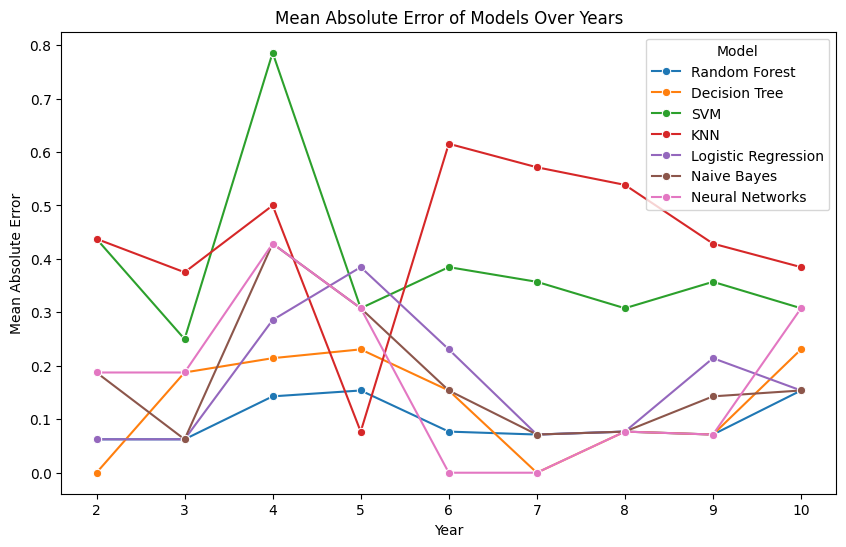

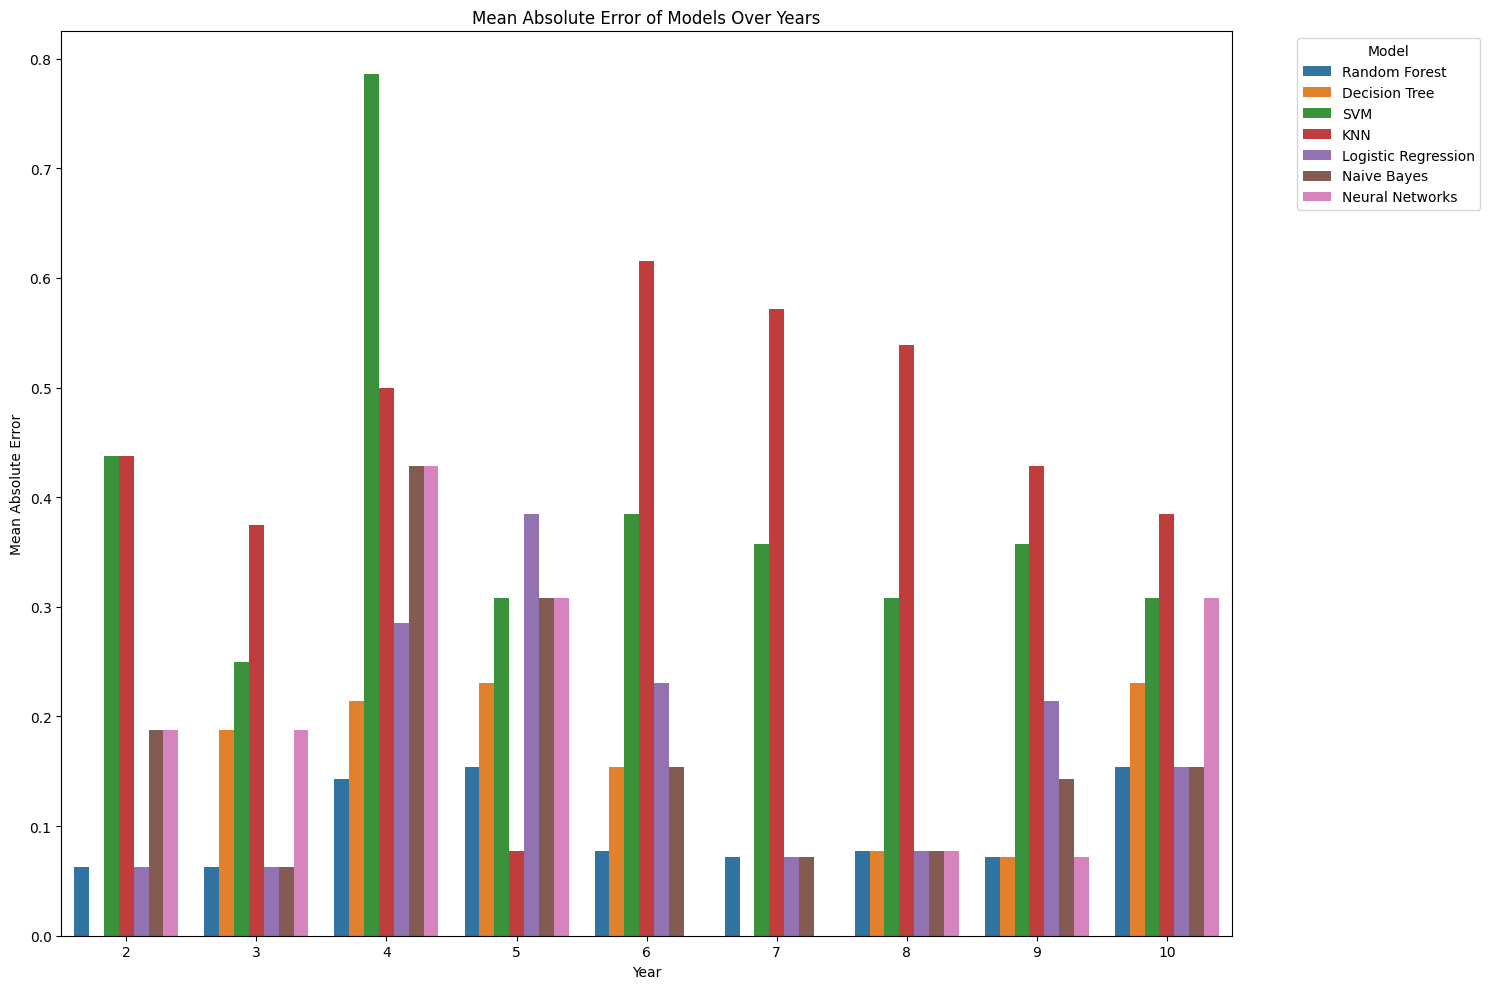

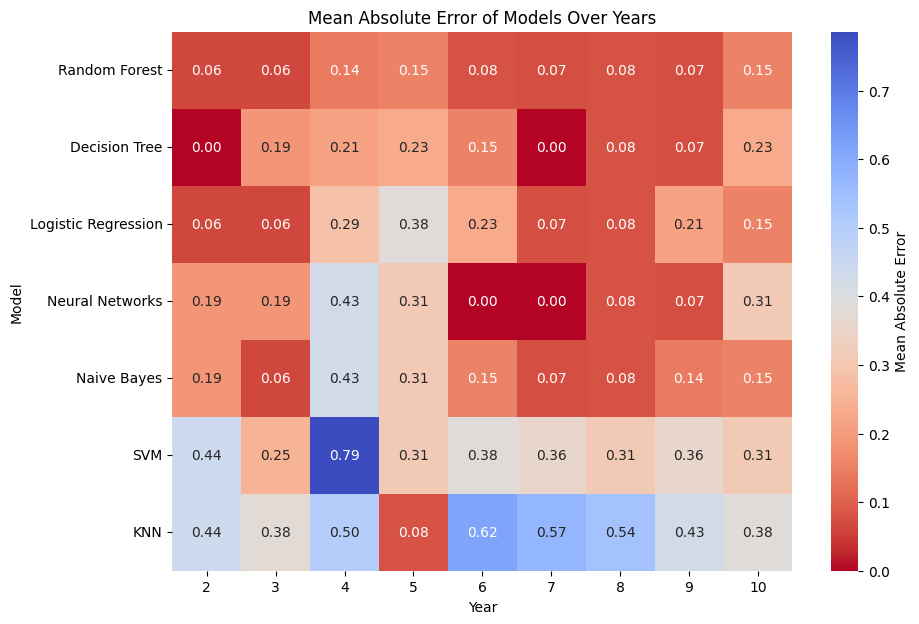

In [783]:
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.DataFrame(results_list)

summary_table = results_df.pivot(index='Year', columns='Model', values='Mean Absolute Error')
print(summary_table)

#table 1
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Year', y='Mean Absolute Error', hue='Model', marker='o')
plt.title('Mean Absolute Error of Models Over Years')
plt.show()

#table 2
plt.figure(figsize=(15, 10))
sns.barplot(data=results_df, x='Year', y='Mean Absolute Error', hue='Model')
plt.title('Mean Absolute Error of Models Over Years')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#table 3
pivot_table = results_df.pivot(index='Model', columns='Year', values='Mean Absolute Error')
mean_errors = pivot_table.mean(axis=1)
sorted_index = mean_errors.sort_values(ascending=True).index
pivot_table = pivot_table.loc[sorted_index]
plt.figure(figsize=(10, 7))
sns.heatmap(data=pivot_table, annot=True, fmt=".2f", cmap='coolwarm_r', cbar_kws={'label': 'Mean Absolute Error'})
plt.title('Mean Absolute Error of Models Over Years')
plt.show()